In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("samplecsv.csv")

df.head()

,food_id,food_data_type,food_description,nutrient_id,CALORIES,Caffeine,Carbohydrate,FAT,"Fat, saturated",Fiber,Iron,Lactose,Protein,Starch,TOTAL TRANS FATTY ACID,Vitamin A,Vitamin B12,Vitamin C,Vitamin D,Vitamin E
0,167512,sr_legacy_food,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",8703,307.0,0.0,41.18,13.24,2.941,1.2,2.12,0.00,5.88,0.00,4.412,0.0,0.00,0.0,0.0,0.0
1,167513,sr_legacy_food,"Pillsbury, Cinnamon Rolls with Icing, refriger...",10969,330.0,0.0,53.42,11.27,3.250,1.4,1.93,0.00,4.34,0.00,4.290,1.0,0.00,0.1,0.0,0.0
2,167514,sr_legacy_food,"Kraft Foods, Shake N Bake Original Recipe, Coa...",4020,377.0,0.0,79.80,3.70,0.000,0.0,0.00,0.00,6.10,0.00,0.000,0.0,0.00,0.0,0.0,0.0
3,167515,sr_legacy_food,"George Weston Bakeries, Thomas English Muffins",8728,232.0,0.0,46.00,1.80,0.308,0.0,1.40,0.00,8.00,0.00,0.082,0.0,0.00,0.0,0.0,0.0
4,167516,sr_legacy_food,"Waffles, buttermilk, frozen, ready-to-heat",13969,273.0,0.0,41.05,9.22,1.898,2.2,6.04,1.35,6.58,35.51,0.000,1340.0,2.86,0.0,0.0,0.0


In [4]:
print(df.isnull().sum())

food_id                   0
food_data_type            0
food_description          1
nutrient_id               0
CALORIES                  0
Caffeine                  0
Carbohydrate              0
FAT                       0
Fat, saturated            0
Fiber                     0
Iron                      0
Lactose                   0
Protein                   0
Starch                    0
TOTAL TRANS FATTY ACID    0
Vitamin A                 0
Vitamin B12               0
Vitamin C                 0
Vitamin D                 0
Vitamin E                 0
dtype: int64


In [5]:
df = df.replace(0, pd.np.nan)

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_9555/1572382666.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df = df.replace(0, pd.np.nan)


In [6]:
print(df.isnull().sum())

food_id                         0
food_data_type                  0
food_description                1
nutrient_id                     0
CALORIES                   111363
Caffeine                  1612068
Carbohydrate               179311
FAT                        502778
Fat, saturated             724989
Fiber                      754359
Iron                       694127
Lactose                   1612618
Protein                    418071
Starch                    1611193
TOTAL TRANS FATTY ACID    1582019
Vitamin A                 1269486
Vitamin B12               1563572
Vitamin C                 1292959
Vitamin D                 1566288
Vitamin E                 1607957
dtype: int64


In [7]:
df = df.replace(pd.np.nan,0)

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_9555/1734287752.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df = df.replace(pd.np.nan,0)


In [8]:
print(df.isnull().sum())

food_id                   0
food_data_type            0
food_description          0
nutrient_id               0
CALORIES                  0
Caffeine                  0
Carbohydrate              0
FAT                       0
Fat, saturated            0
Fiber                     0
Iron                      0
Lactose                   0
Protein                   0
Starch                    0
TOTAL TRANS FATTY ACID    0
Vitamin A                 0
Vitamin B12               0
Vitamin C                 0
Vitamin D                 0
Vitamin E                 0
dtype: int64


In [9]:
corr_matrix = df.corr()
corr_matrix

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_9555/2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,food_id,nutrient_id,CALORIES,Caffeine,Carbohydrate,FAT,"Fat, saturated",Fiber,Iron,Lactose,Protein,Starch,TOTAL TRANS FATTY ACID,Vitamin A,Vitamin B12,Vitamin C,Vitamin D,Vitamin E
food_id,1.000000,0.001965,0.018944,0.000889,0.006403,0.001979,0.002774,0.003583,-0.000233,-0.013917,0.009370,-0.052683,-0.000678,-0.013865,-0.000119,0.001203,0.000890,0.001081
nutrient_id,0.001965,1.000000,0.126511,0.001020,0.045789,0.113559,0.095538,0.138193,-0.000753,-0.001310,0.196972,-0.015607,0.006785,0.076749,0.001770,-0.008482,0.070137,-0.000230
CALORIES,0.018944,0.126511,1.000000,-0.001931,0.644908,0.680496,0.482154,0.323036,0.001735,-0.002266,0.423784,-0.014244,0.046461,0.066443,0.000672,0.001888,0.125511,0.004744
Caffeine,0.000889,0.001020,-0.001931,1.000000,-0.001319,-0.001695,-0.001141,-0.001085,-0.000017,0.000012,-0.001503,-0.000091,-0.000067,-0.000469,-0.000006,-0.000061,-0.000189,-0.000015
Carbohydrate,0.006403,0.045789,0.644908,-0.001319,1.000000,0.148474,0.101009,0.293039,0.003158,-0.002717,0.235622,-0.010750,0.043919,0.070062,0.002004,0.008441,0.122670,-0.000246
FAT,0.001979,0.113559,0.680496,-0.001695,0.148474,1.000000,0.692584,0.201879,0.000614,-0.001084,0.300945,-0.010030,0.017887,0.022020,-0.000909,-0.005088,0.047333,0.007620
"Fat, saturated",0.002774,0.095538,0.482154,-0.001141,0.101009,0.692584,1.000000,0.076100,0.006330,-0.000314,0.197791,-0.009242,0.011429,0.016572,-0.000671,-0.004880,0.006992,0.000247
Fiber,0.003583,0.138193,0.323036,-0.001085,0.293039,0.201879,0.076100,1.000000,0.004928,-0.002903,0.324613,0.007009,0.011409,0.064742,0.000161,0.000267,0.049630,0.001764
Iron,-0.000233,-0.000753,0.001735,-0.000017,0.003158,0.000614,0.006330,0.004928,1.000000,-0.000023,0.007611,0.000010,-0.000053,0.004554,0.028130,0.000717,0.001109,0.000064
Lactose,-0.013917,-0.001310,-0.002266,0.000012,-0.002717,-0.001084,-0.000314,-0.002903,-0.000023,1.000000,-0.001651,0.018737,0.000261,0.000935,-0.000015,0.000029,0.009389,-0.000036


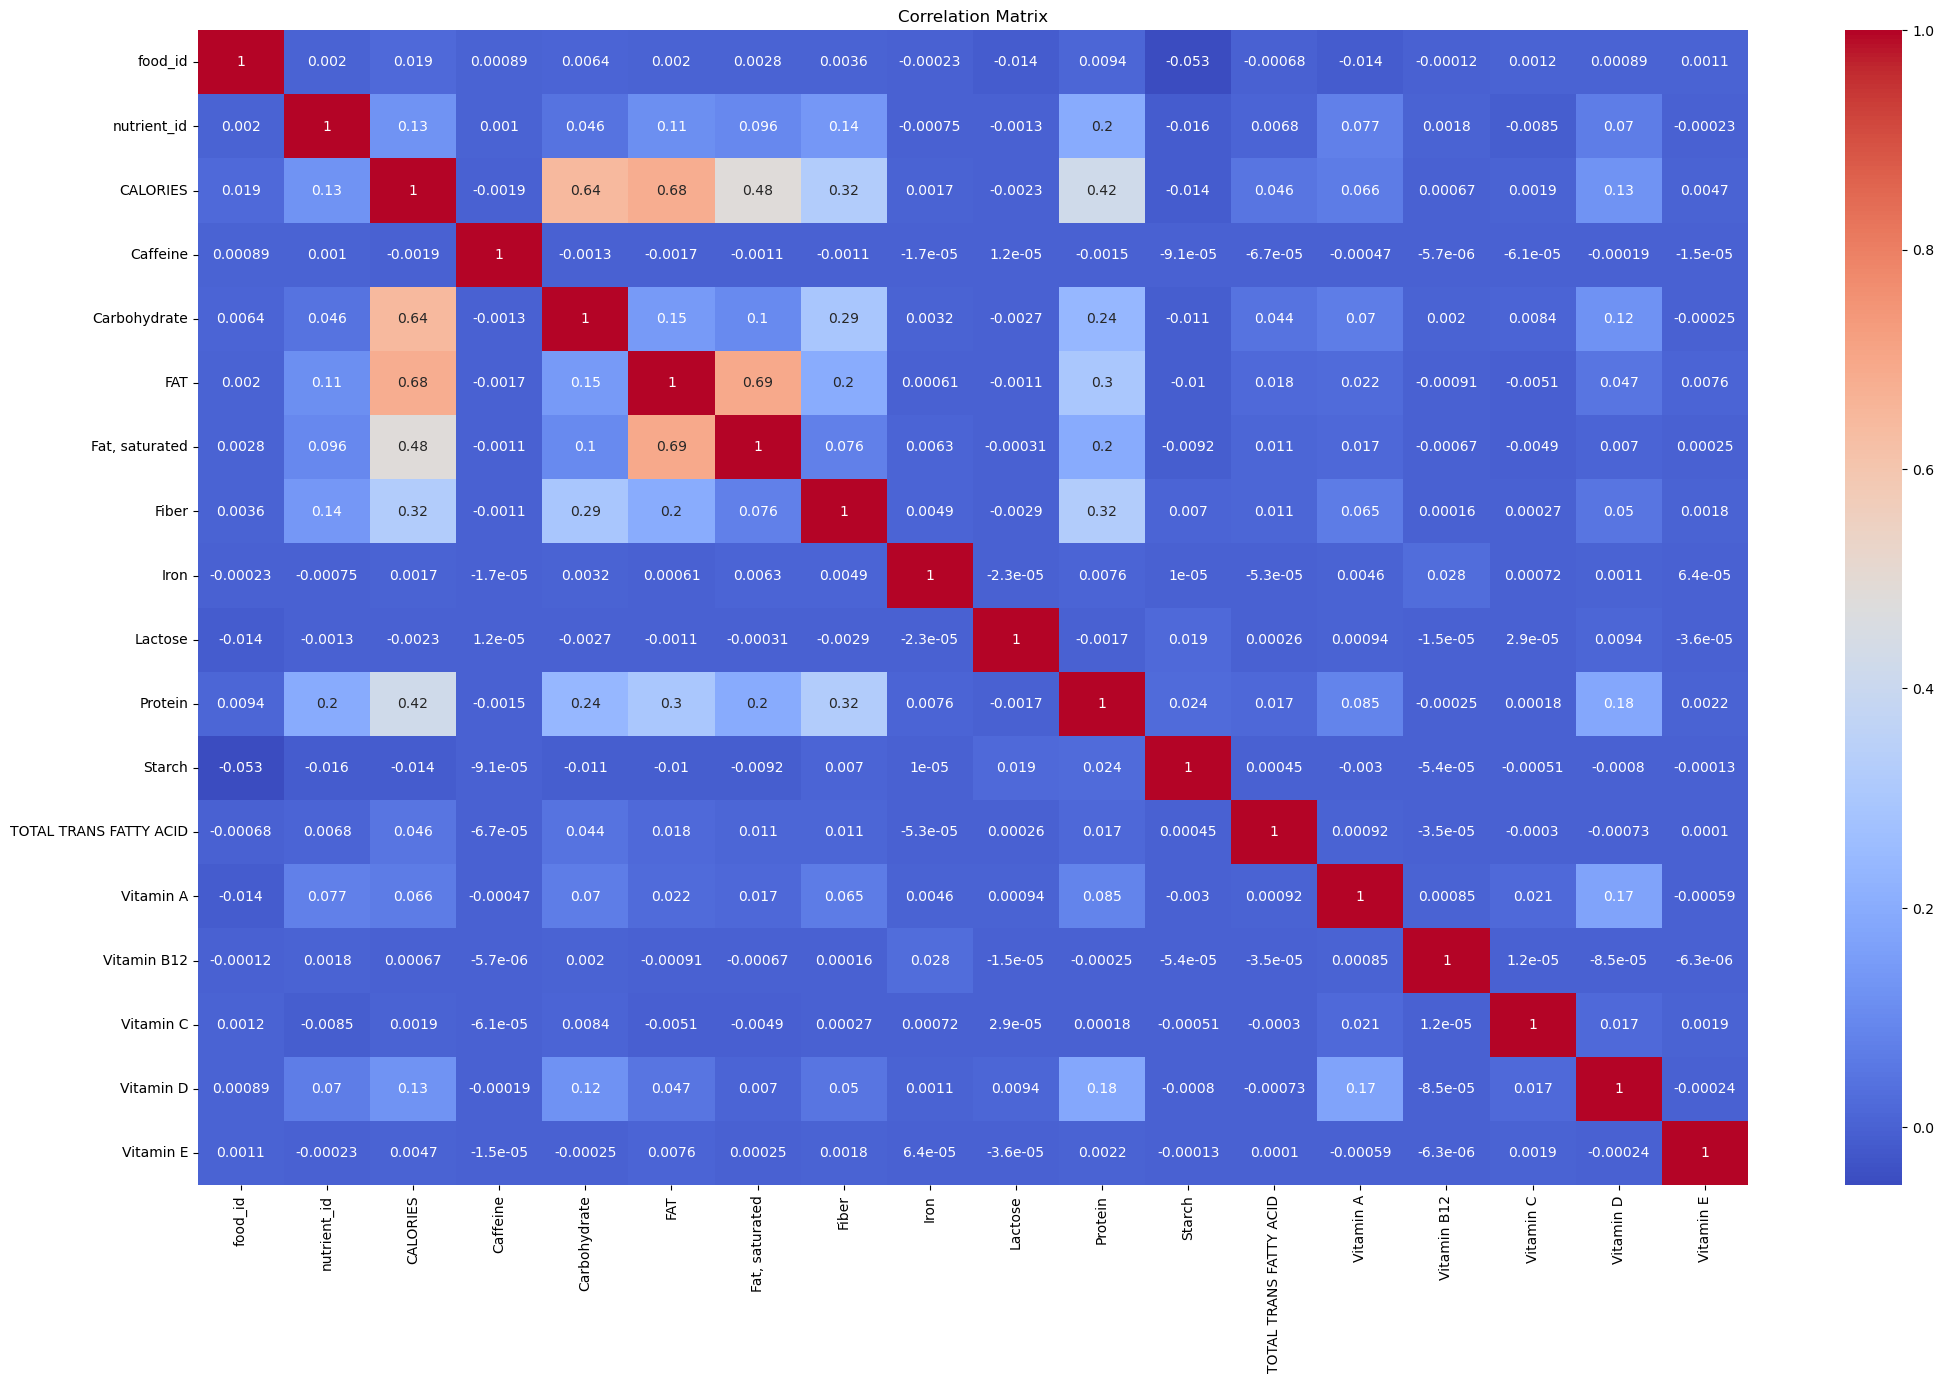

In [10]:
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

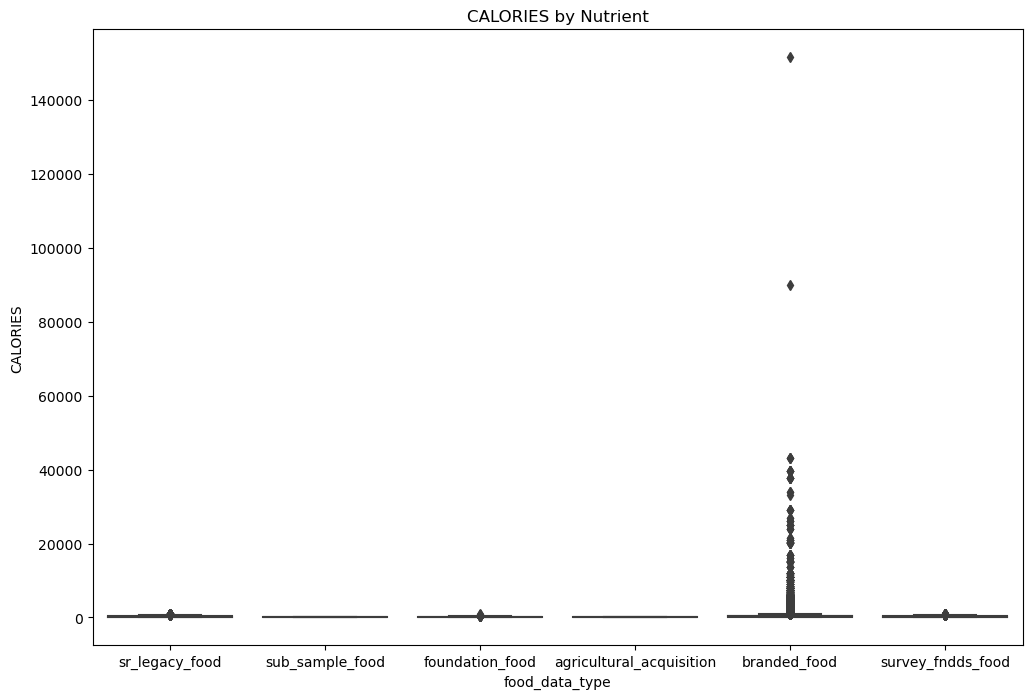

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="food_data_type", y="CALORIES", data=df)
plt.title("CALORIES by Nutrient")
plt.show()

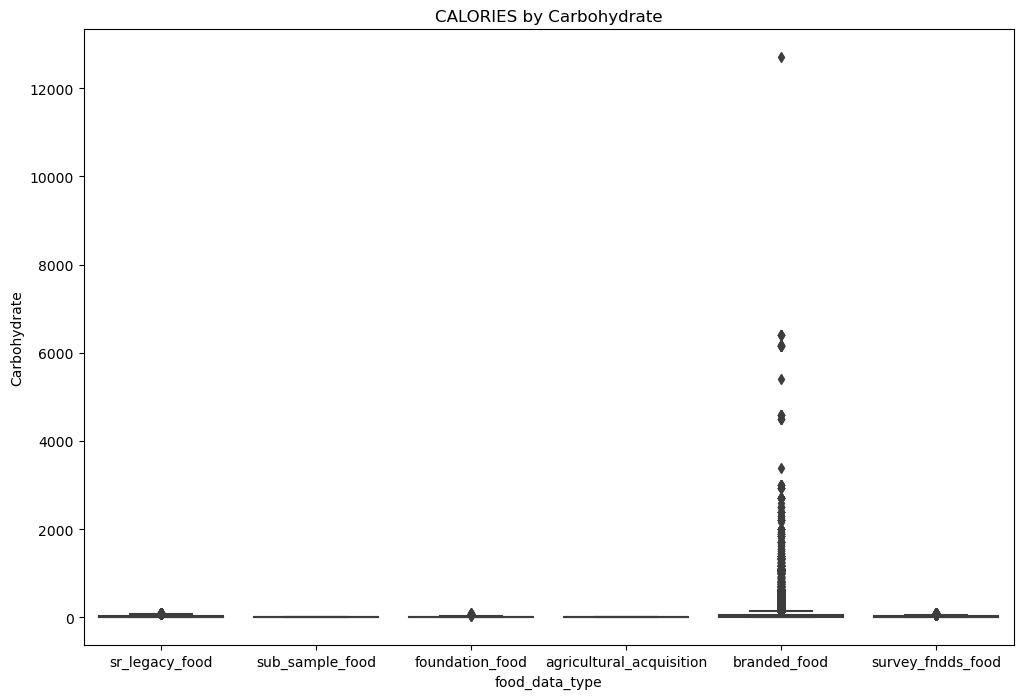

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="food_data_type", y="Carbohydrate", data=df)
plt.title("CALORIES by Carbohydrate")
plt.show()

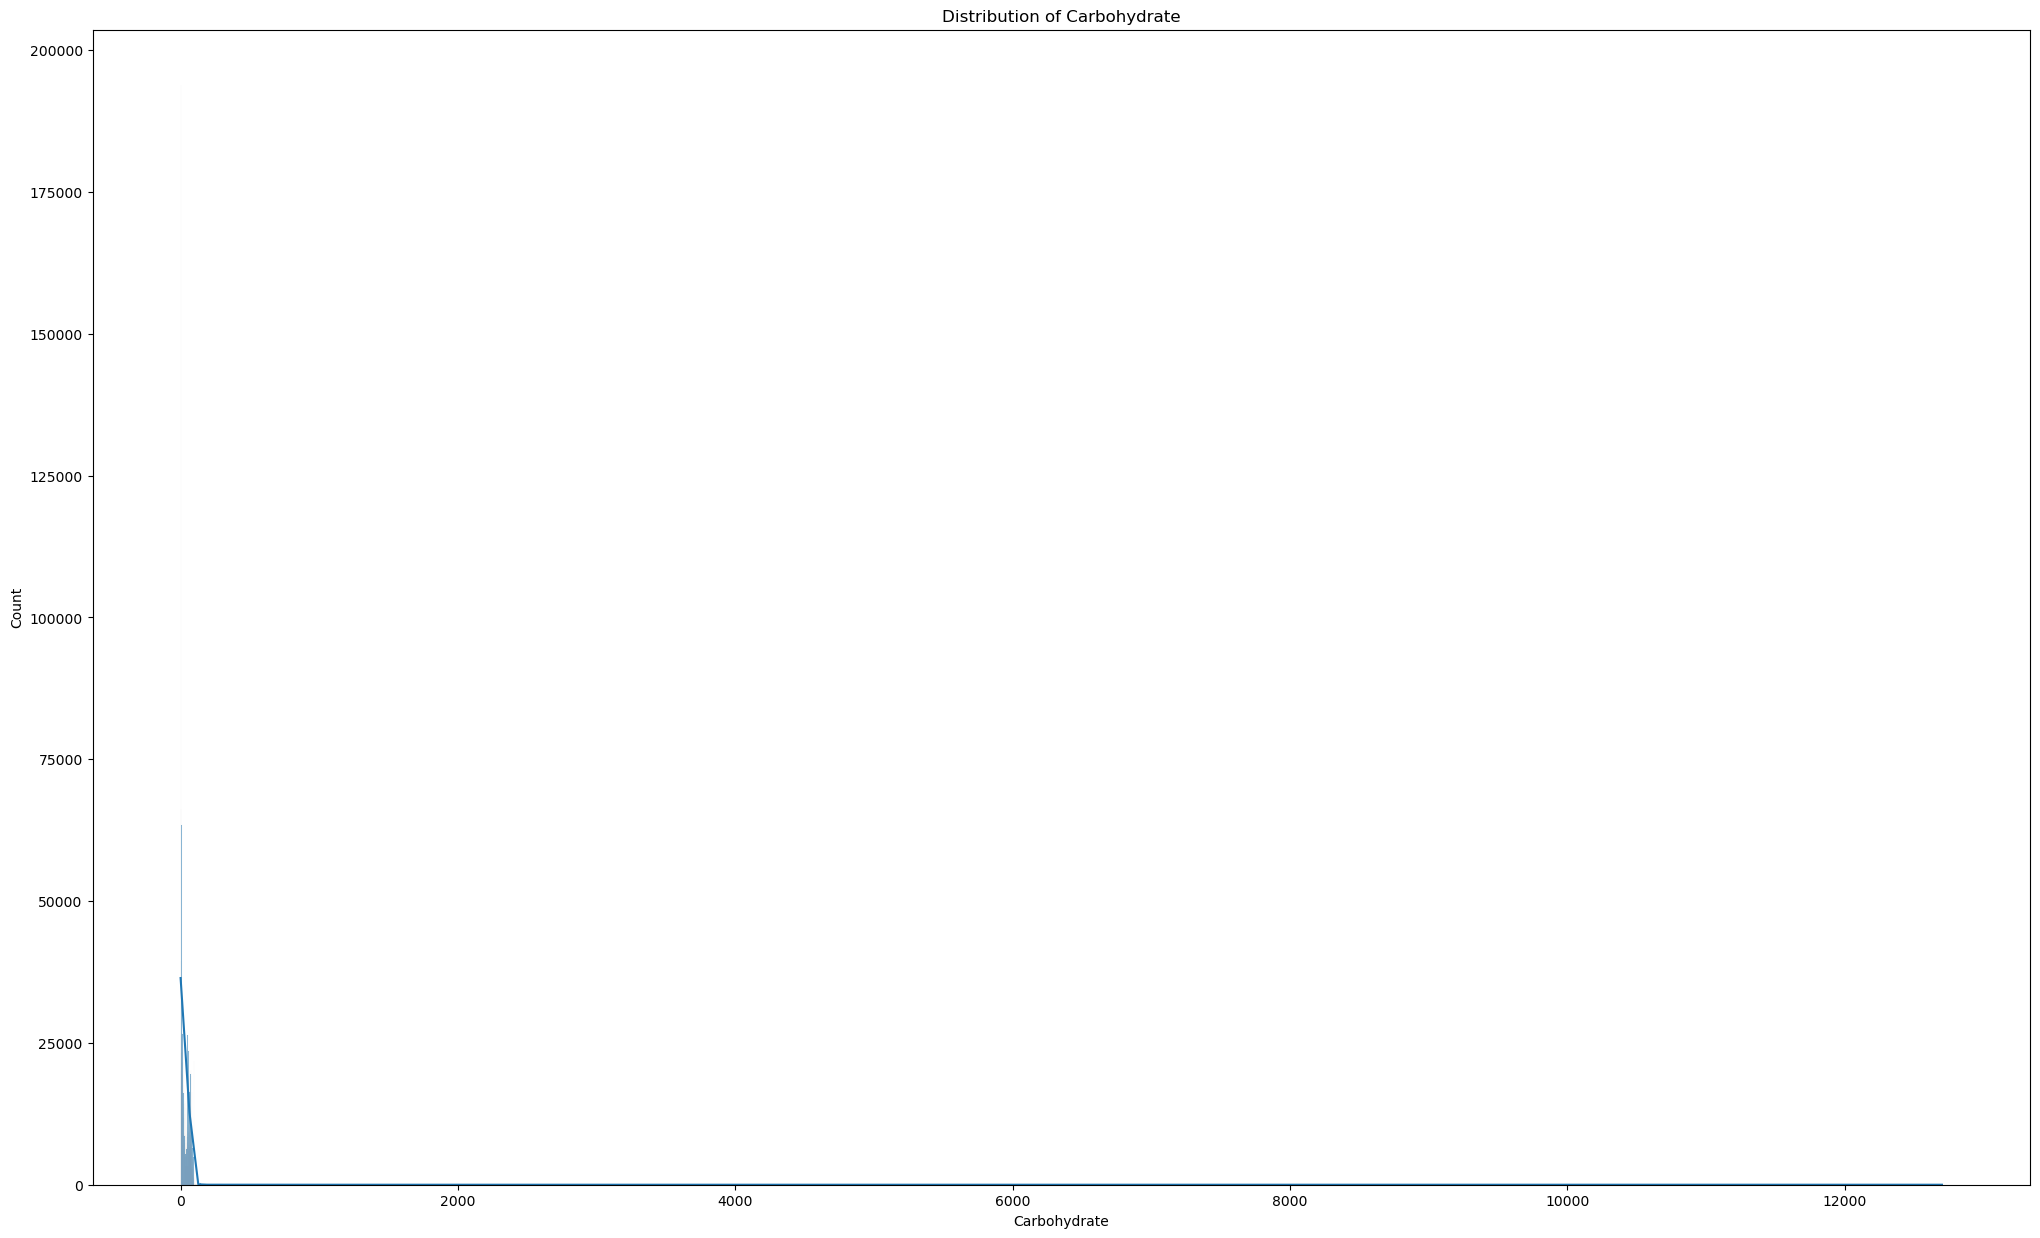

In [23]:
plt.figure(figsize=(25, 15))
sns.histplot(df["Carbohydrate"], kde=True)
plt.title("Distribution of Carbohydrate")
plt.show()

In [18]:
print(df.describe())

            food_id   nutrient_id      CALORIES      Caffeine  Carbohydrate  \
count  1.613224e+06  1.613224e+06  1.613224e+06  1.613224e+06  1.613224e+06   
mean   1.392549e+06  9.312964e+03  2.675458e+02  2.200153e-01  3.418057e+01   
std    5.953229e+05  2.457244e+03  3.288302e+02  6.428417e+01  4.735067e+01   
min    1.675120e+05  1.003000e+03  0.000000e+00  0.000000e+00  0.000000e+00   
25%    8.829975e+05  8.703000e+03  8.000000e+01  0.000000e+00  6.670000e+00   
50%    1.485892e+06  9.813000e+03  2.600000e+02  0.000000e+00  2.308000e+01   
75%    1.898152e+06  1.096900e+04  4.000000e+02  0.000000e+00  6.000000e+01   
max    2.353553e+06  1.633600e+04  1.515150e+05  2.800000e+04  1.270000e+04   

                FAT  Fat, saturated         Fiber          Iron       Lactose  \
count  1.613224e+06    1.613224e+06  1.613224e+06  1.613224e+06  1.613224e+06   
mean   1.221750e+01    4.168888e+00  2.400594e+00  4.082915e+00  1.023880e-03   
std    2.213533e+01    1.041142e+01  6.123703

In [19]:
mini = df.min()
mini

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_9555/802141349.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mini = df.min()


food_id                                     167512
food_data_type            agricultural_acquisition
nutrient_id                                   1003
CALORIES                                       0.0
Caffeine                                       0.0
Carbohydrate                                   0.0
FAT                                            0.0
Fat, saturated                                 0.0
Fiber                                          0.0
Iron                                           0.0
Lactose                                        0.0
Protein                                        0.0
Starch                                         0.0
TOTAL TRANS FATTY ACID                         0.0
Vitamin A                                      0.0
Vitamin B12                                    0.0
Vitamin C                                      0.0
Vitamin D                                      0.0
Vitamin E                                      0.0
dtype: object

In [21]:
maxi = df.max()
maxi

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_9555/1102070601.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  maxi = df.max()


food_id                             2353553
food_data_type            survey_fndds_food
nutrient_id                           16336
CALORIES                           151515.0
Caffeine                            28000.0
Carbohydrate                        12700.0
FAT                                  3200.0
Fat, saturated                       3000.0
Fiber                                1770.0
Iron                              769230.77
Lactose                                56.0
Protein                              3400.0
Starch                                73.83
TOTAL TRANS FATTY ACID               615.38
Vitamin A                          333333.0
Vitamin B12                     65789473.68
Vitamin C                          210000.0
Vitamin D                           10000.0
Vitamin E                           13333.0
dtype: object

In [25]:
df1 = df[df["food_data_type"] == "Generic"]

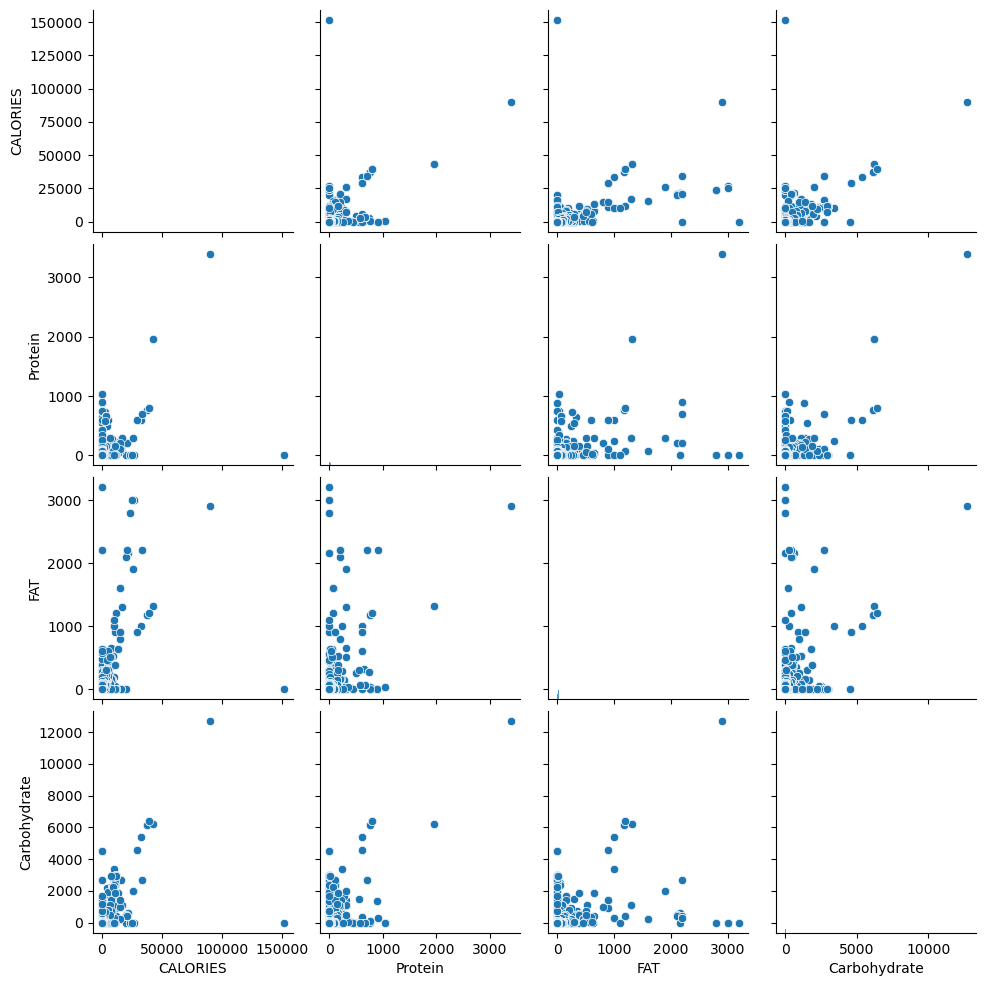

In [28]:
selected_variables = ["CALORIES", "Protein", "FAT", "Carbohydrate"]
sns.pairplot(df[selected_variables])
plt.show()

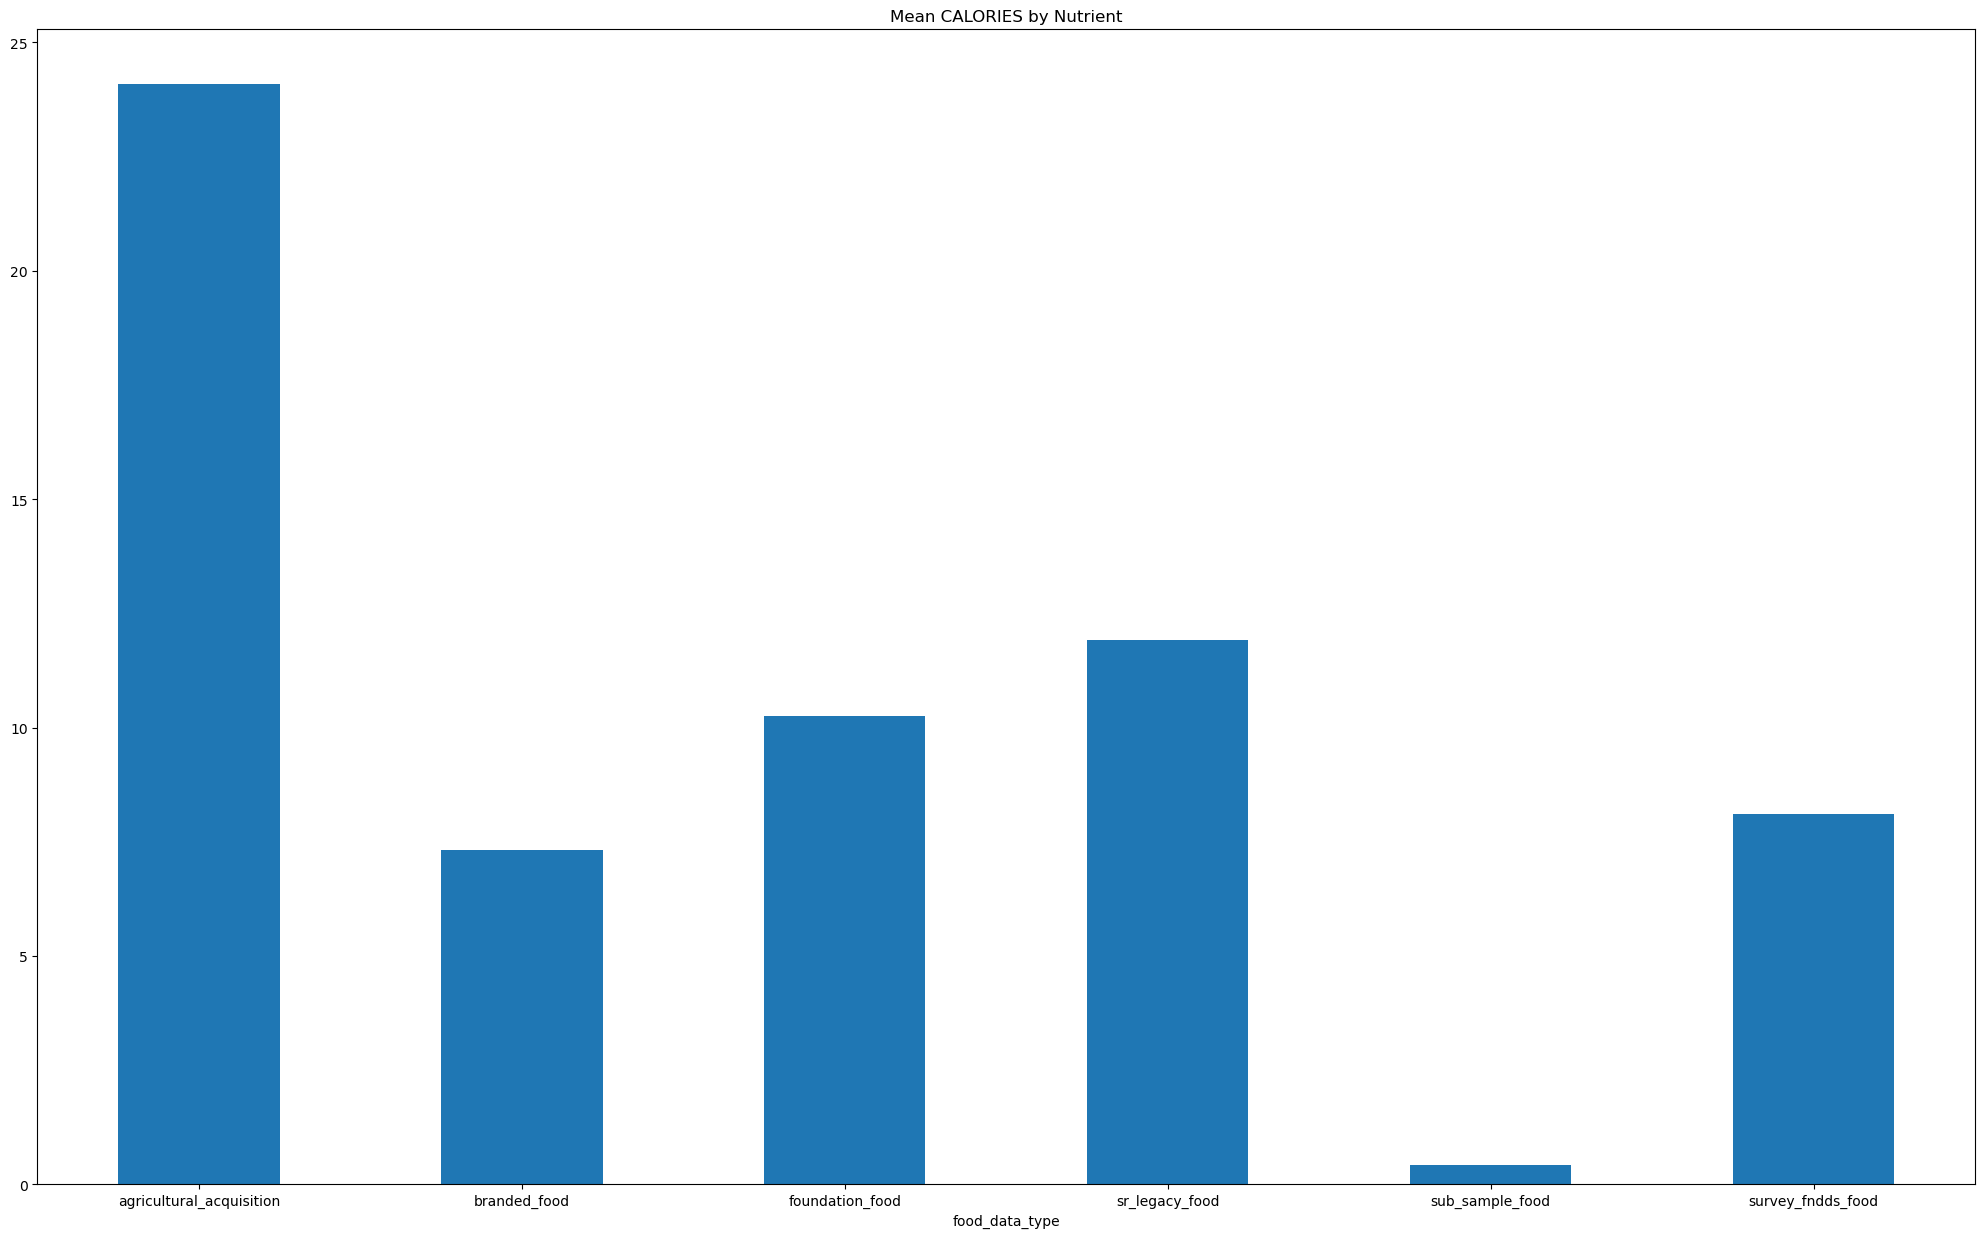

In [8]:
plt.figure(figsize=(25, 15))
calories_by_nutrient = df.groupby("food_data_type")["Protein"].mean()
calories_by_nutrient.plot(kind="bar", rot=0)
plt.title("Mean CALORIES by Nutrient")
plt.show()

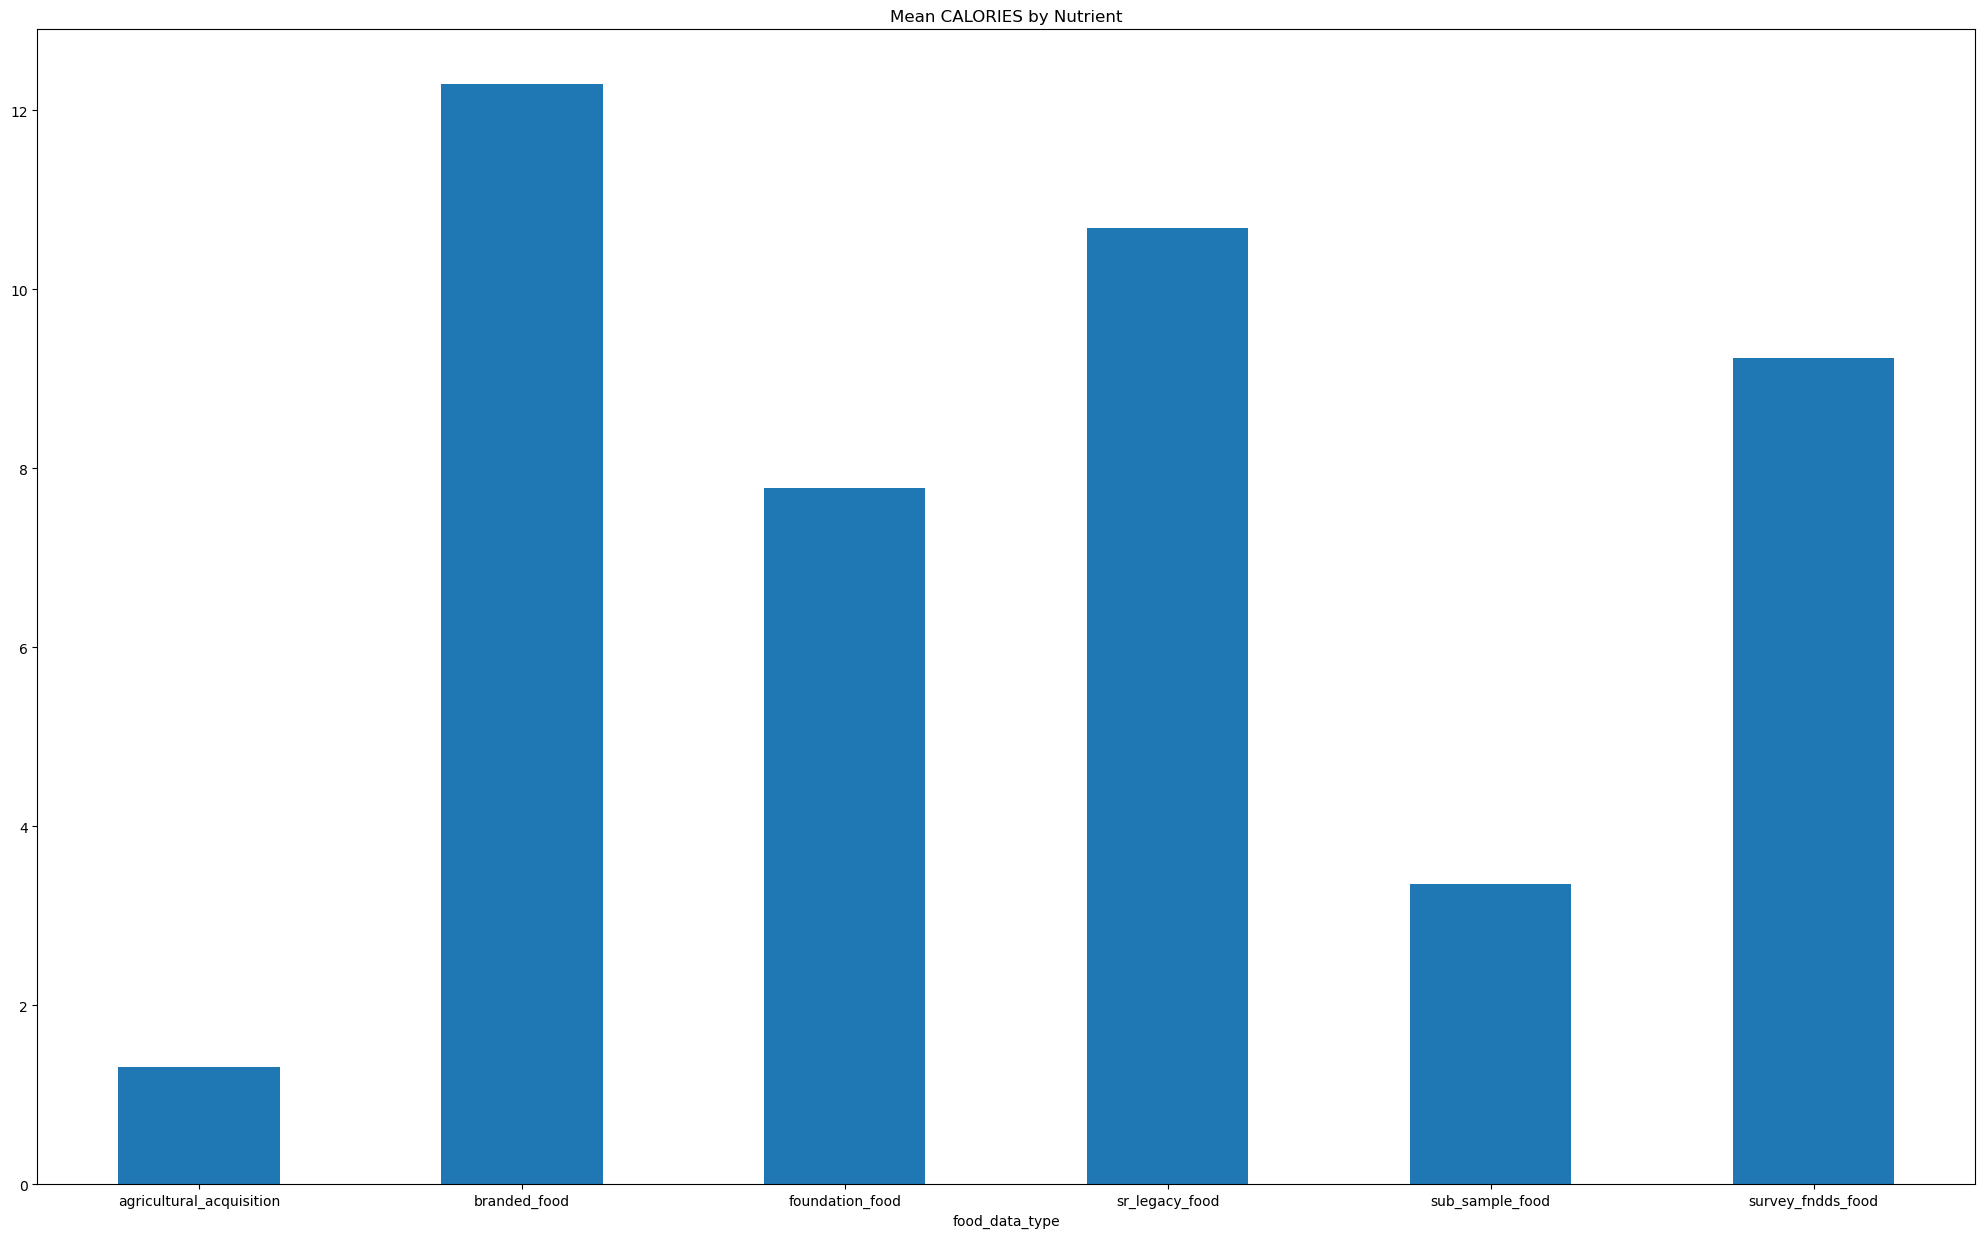

In [9]:
plt.figure(figsize=(25, 15))
calories_by_nutrient = df.groupby("food_data_type")["FAT"].mean()
calories_by_nutrient.plot(kind="bar", rot=0)
plt.title("Mean CALORIES by Nutrient")
plt.show()

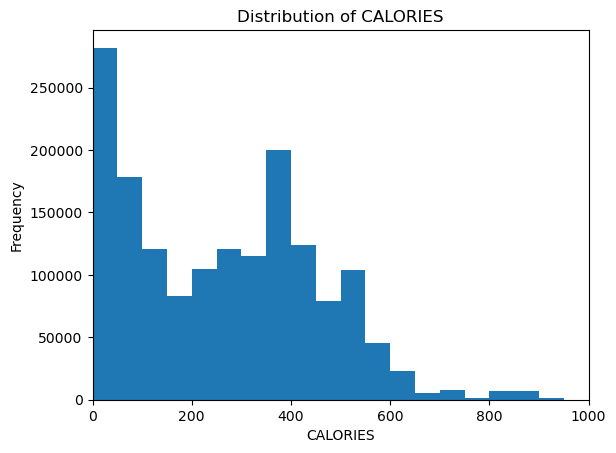

In [16]:
bin_width = 50
plt.hist(df["CALORIES"], bins=range(0, int(df["CALORIES"].max()) + bin_width, bin_width))
plt.xlabel("CALORIES")
plt.ylabel("Frequency")
plt.title("Distribution of CALORIES")
plt.xlim(0, 1000) # Set the x-axis limits to 0 and 1000
plt.show()

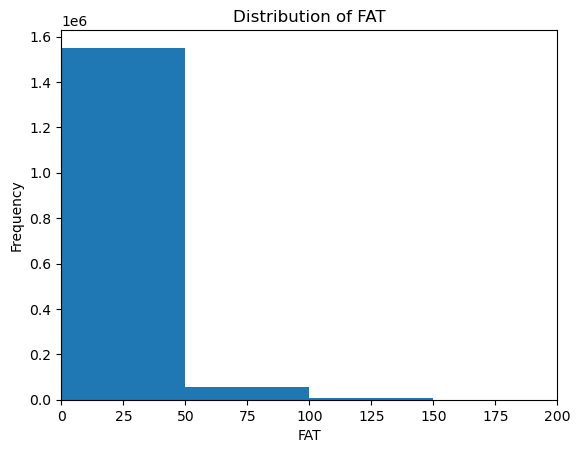

In [20]:
bin_width = 50
plt.hist(df["FAT"], bins=range(0, int(df["FAT"].max()) + bin_width, bin_width))
plt.xlabel("FAT")
plt.ylabel("Frequency")
plt.title("Distribution of FAT")
plt.xlim(0, 200) # Set the x-axis limits to 0 and 1000
plt.show()

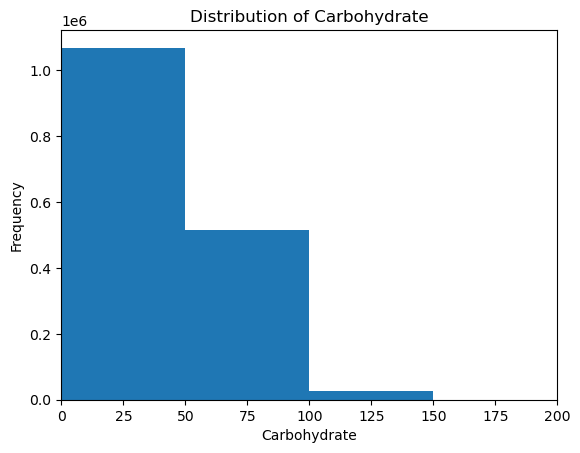

In [24]:
plt.hist(df["Carbohydrate"], bins=range(0, int(df["Carbohydrate"].max()) + bin_width, bin_width))
plt.xlabel("Carbohydrate")
plt.ylabel("Frequency")
plt.title("Distribution of Carbohydrate")
plt.xlim(0, 200) # Set the x-axis limits to 0 and 1000
plt.show()

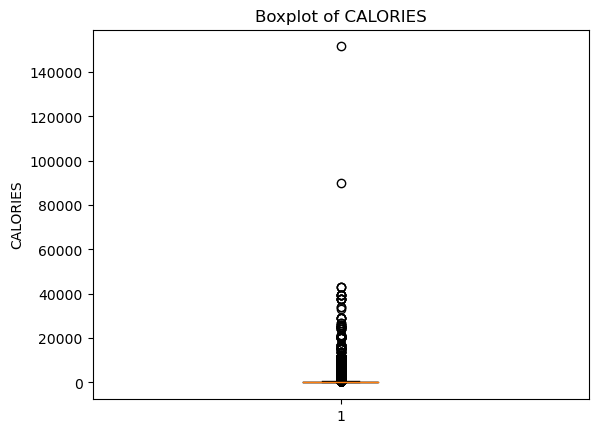

In [25]:
plt.boxplot(df["CALORIES"])
plt.ylabel("CALORIES")
plt.title("Boxplot of CALORIES")
plt.show()

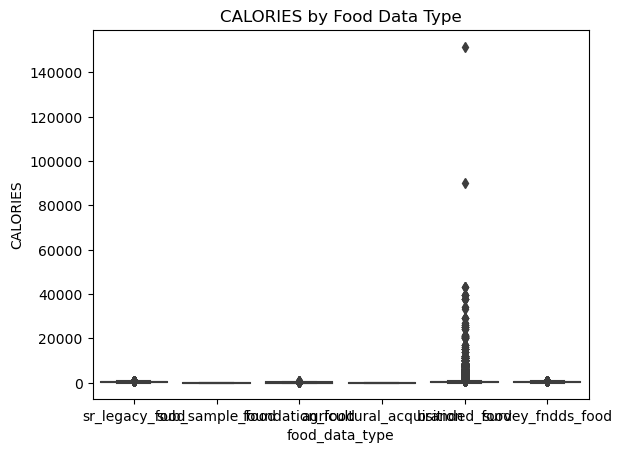

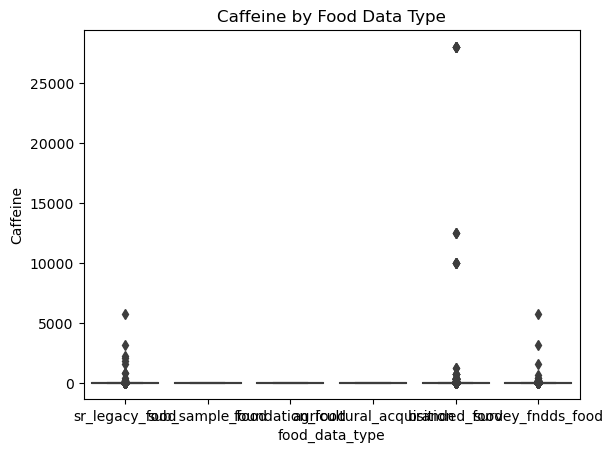

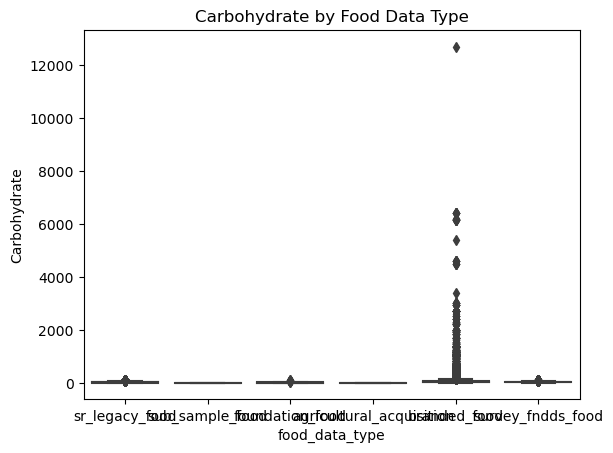

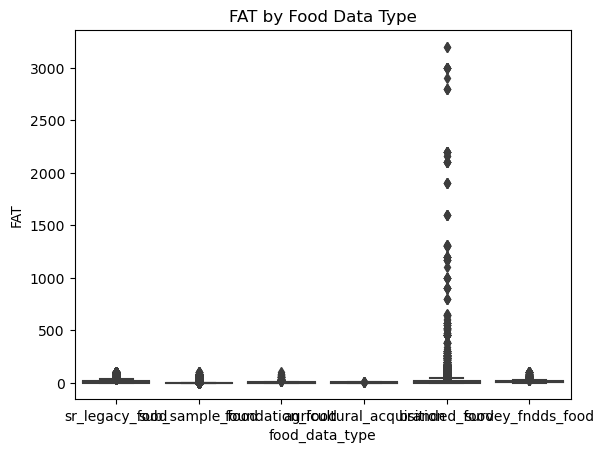

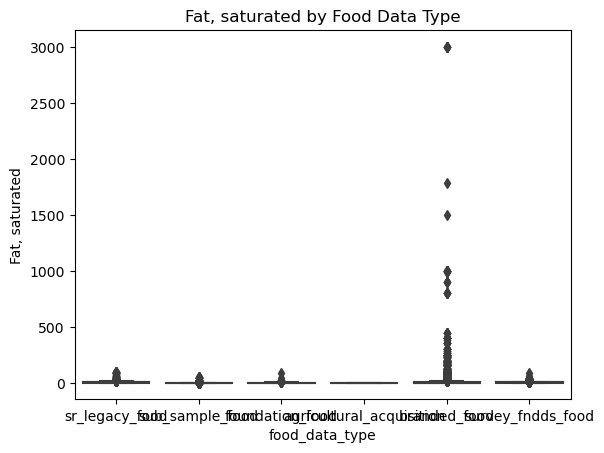

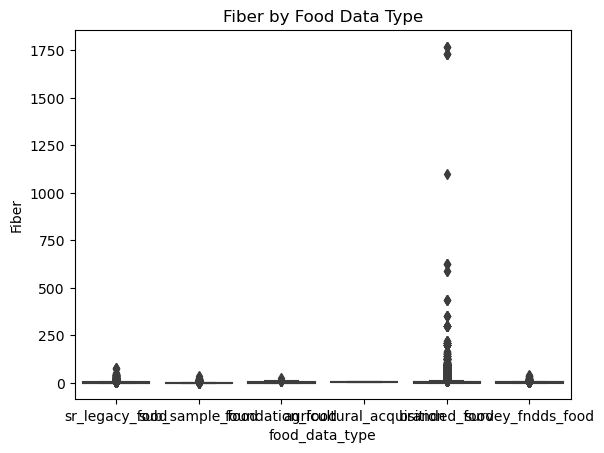

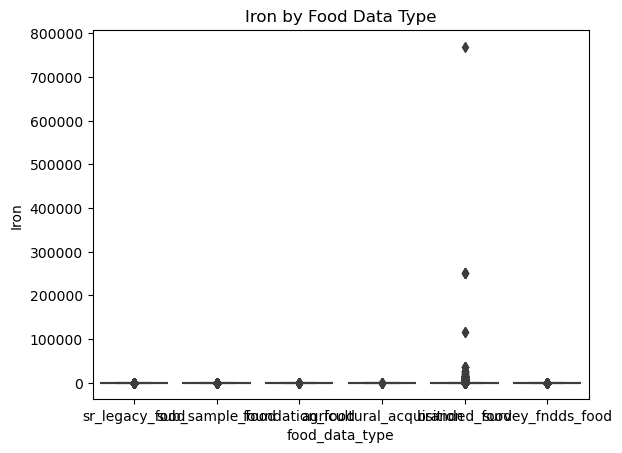

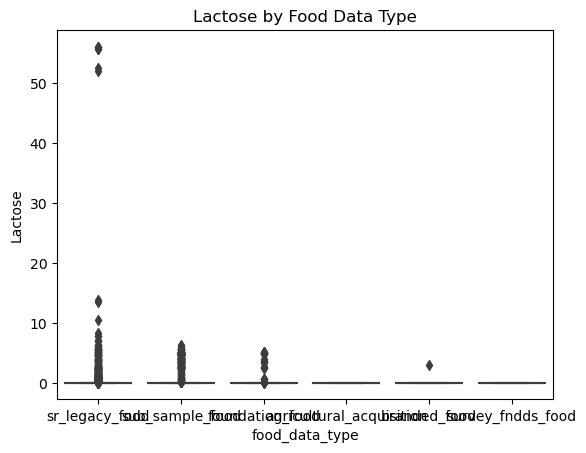

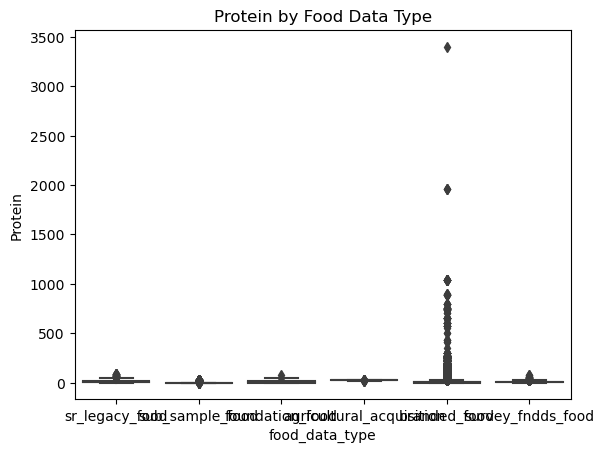

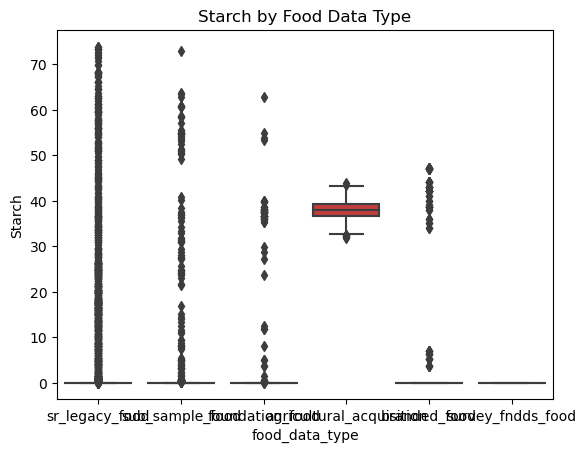

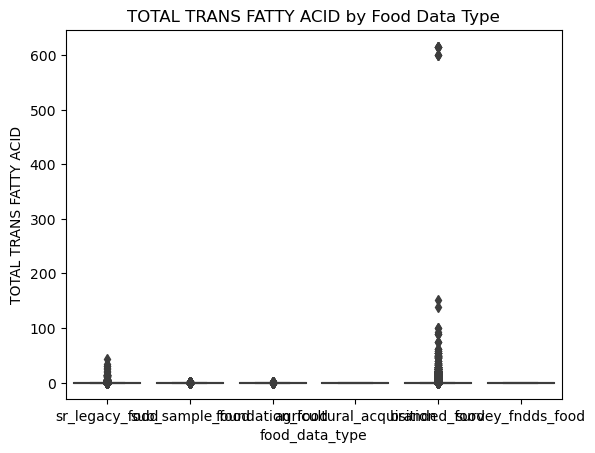

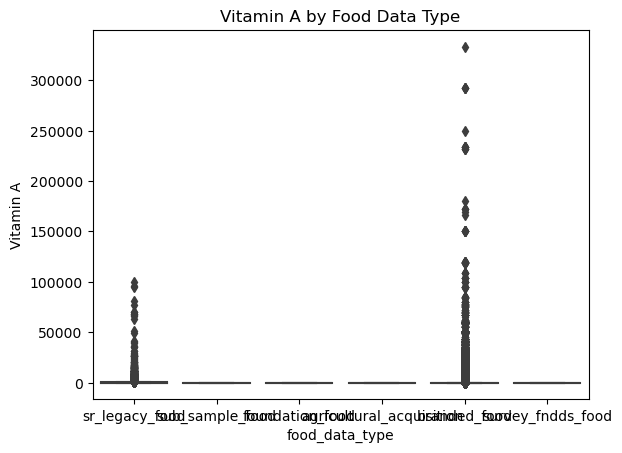

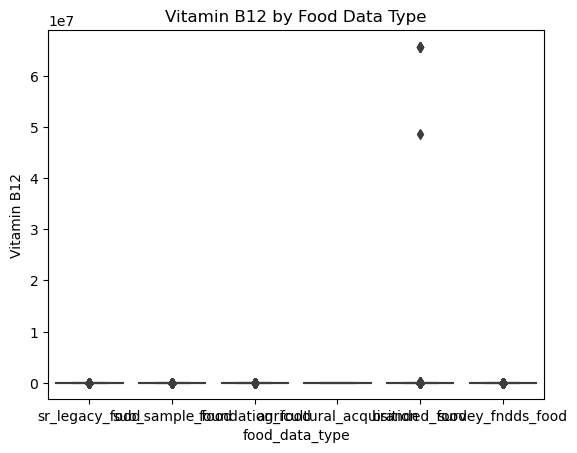

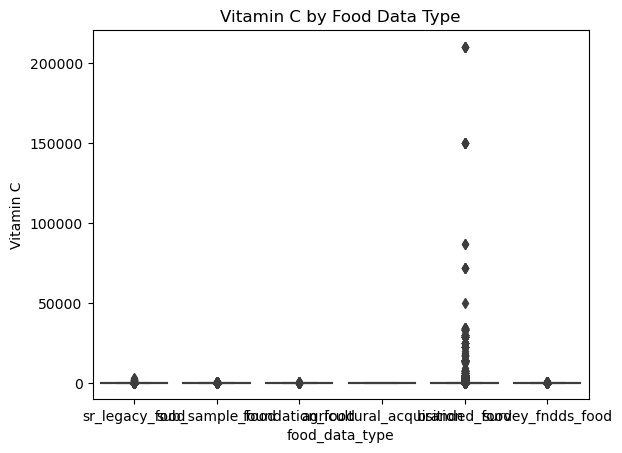

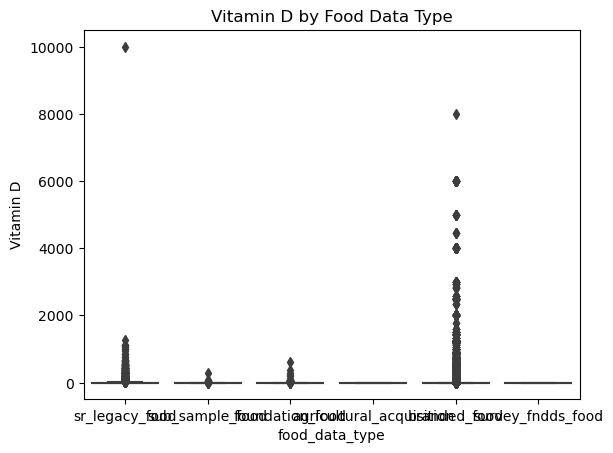

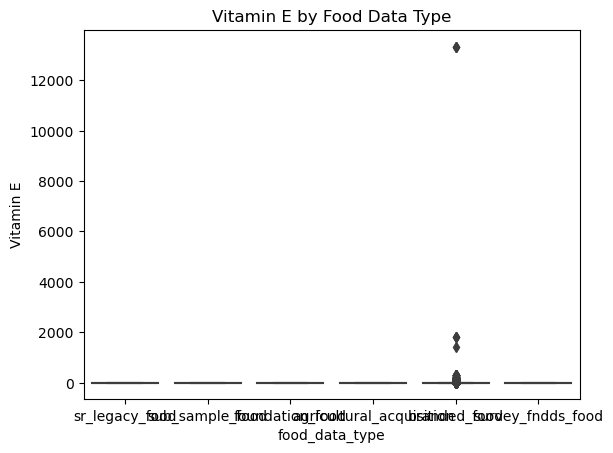

In [6]:
nutrition_cols = [col for col in df.columns if col not in ["food_id", "food_data_type", "food_description", "nutrient_id"]]
for col in nutrition_cols:
    sns.boxplot(x="food_data_type", y=col, data=df)
    plt.title(f"{col} by Food Data Type")
    plt.show()

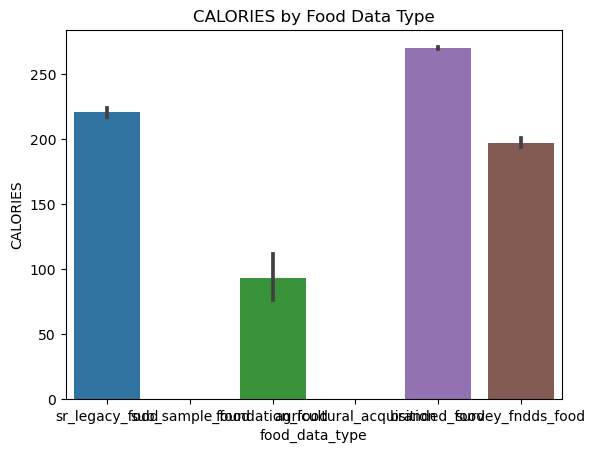

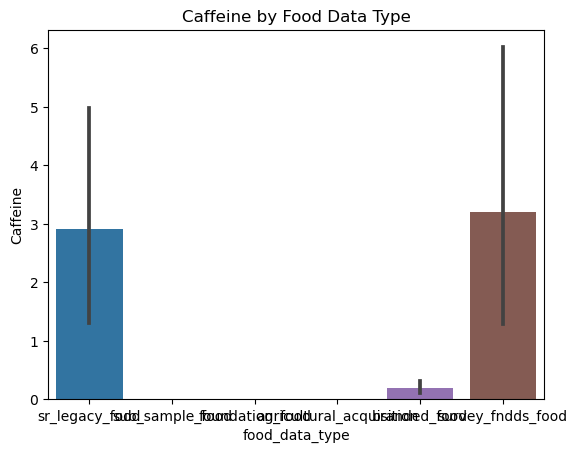

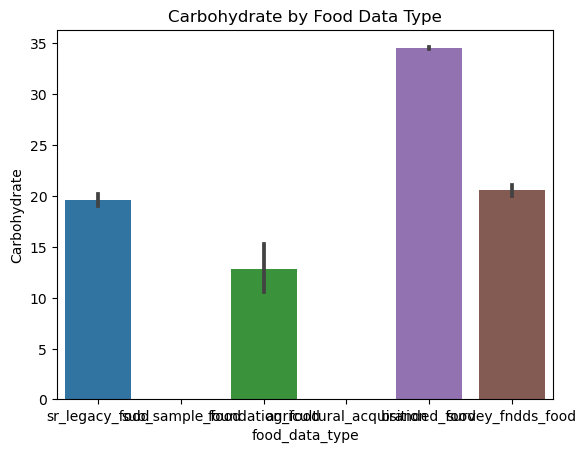

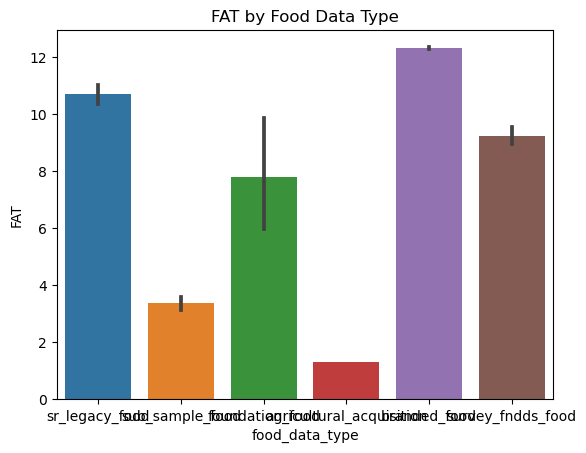

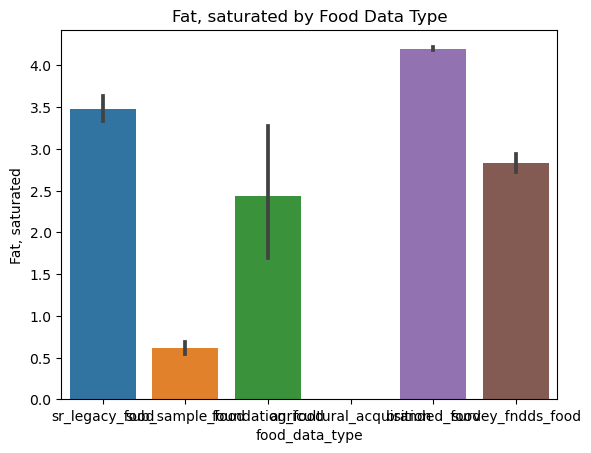

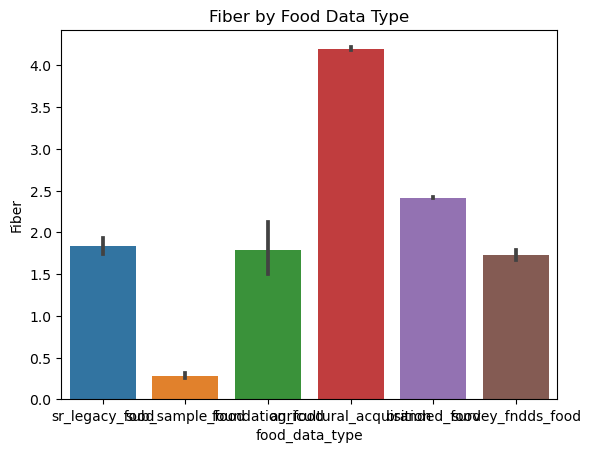

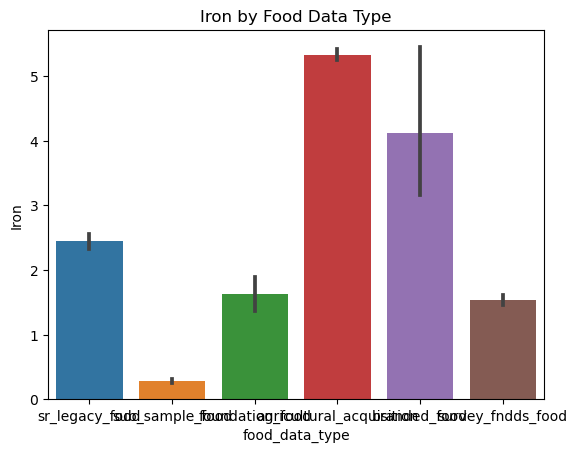

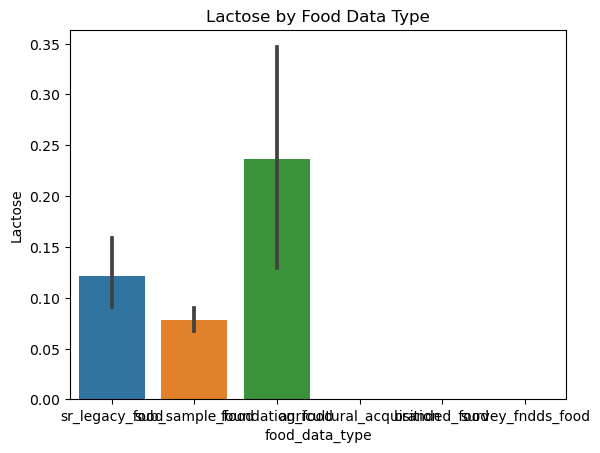

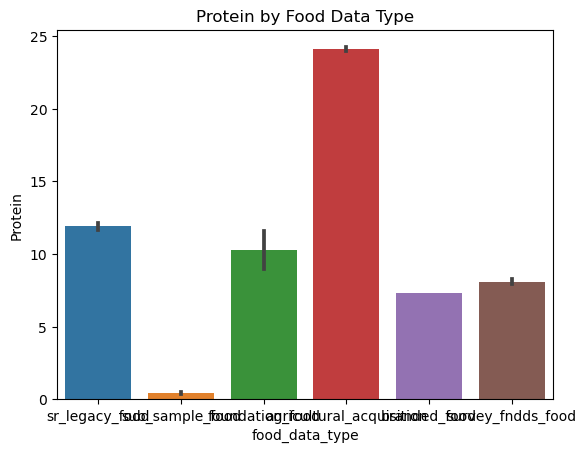

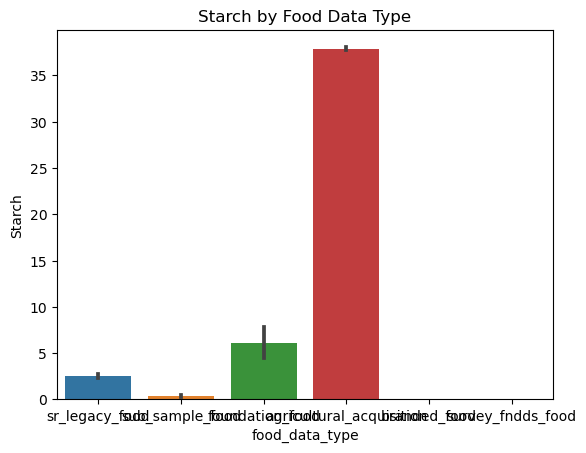

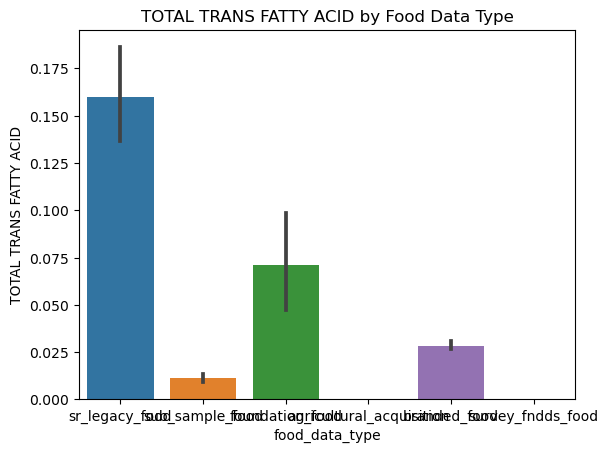

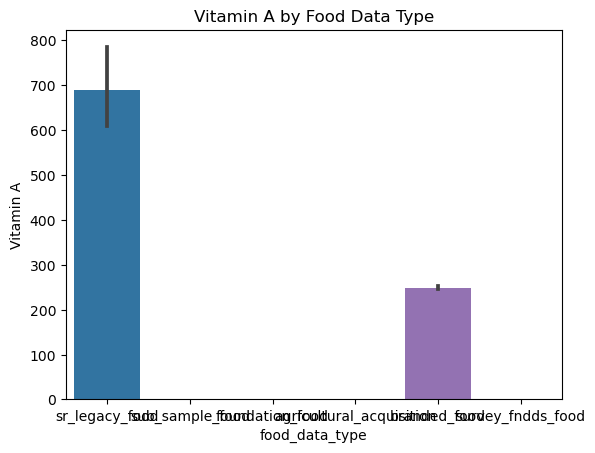

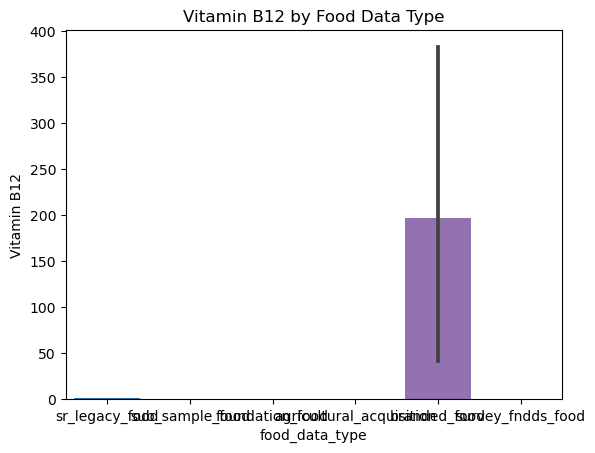

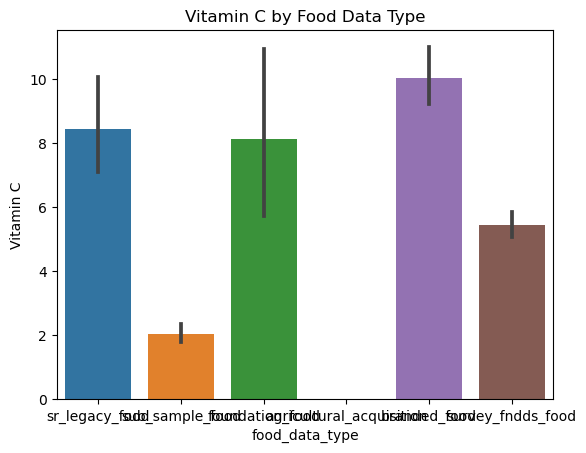

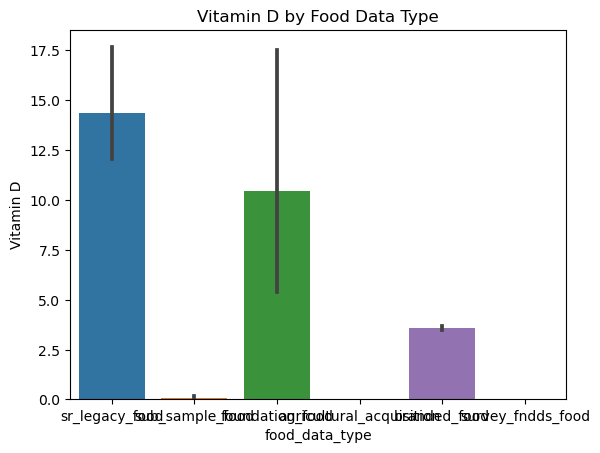

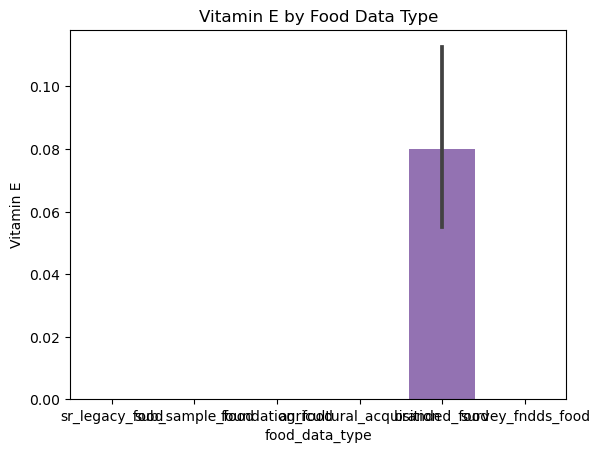

In [7]:
nutrition_cols = [col for col in df.columns if col not in ["food_id", "food_data_type", "food_description", "nutrient_id"]]
for col in nutrition_cols:
    sns.barplot(x="food_data_type", y=col, data=df)
    plt.title(f"{col} by Food Data Type")
    plt.show()

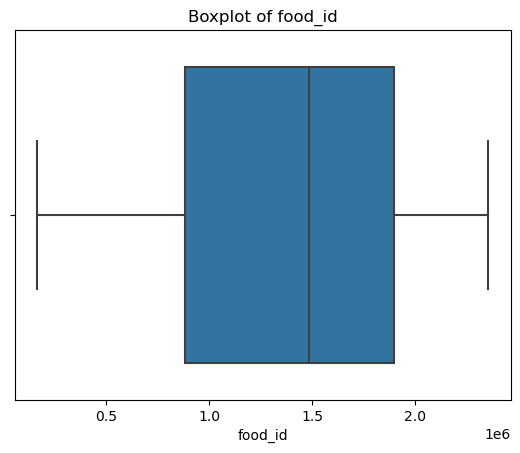

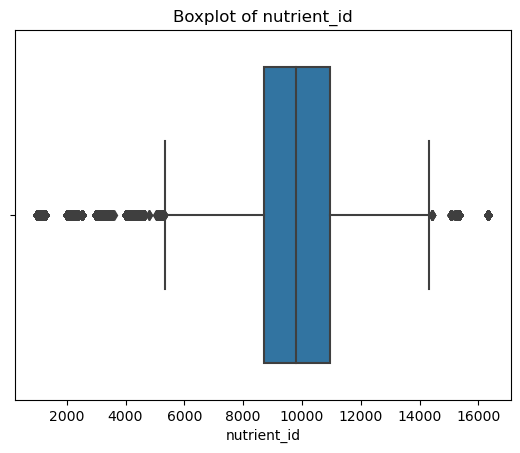

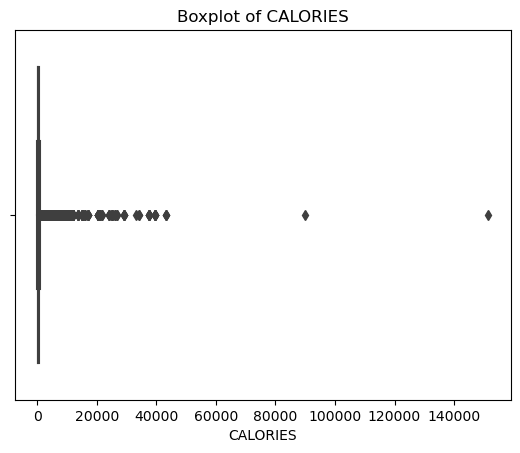

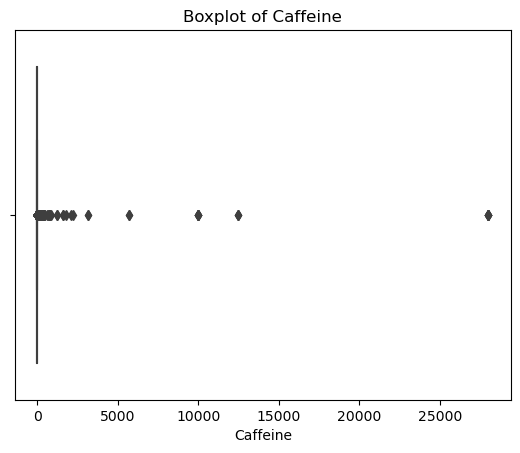

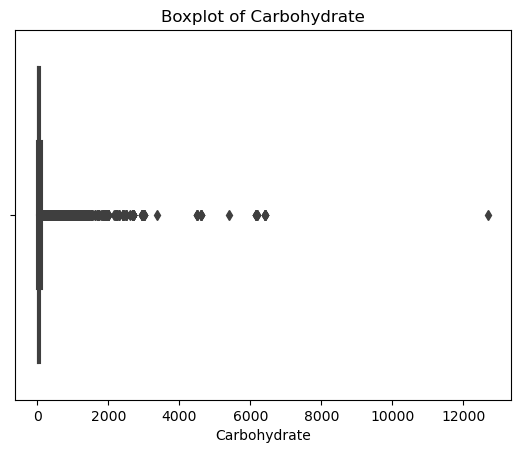

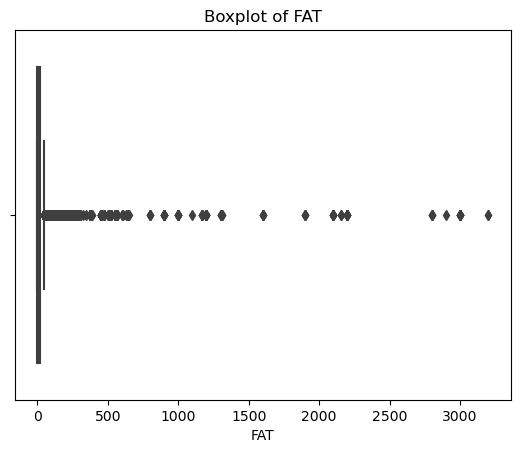

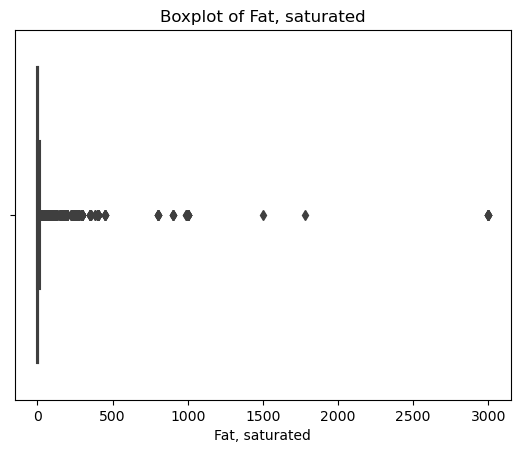

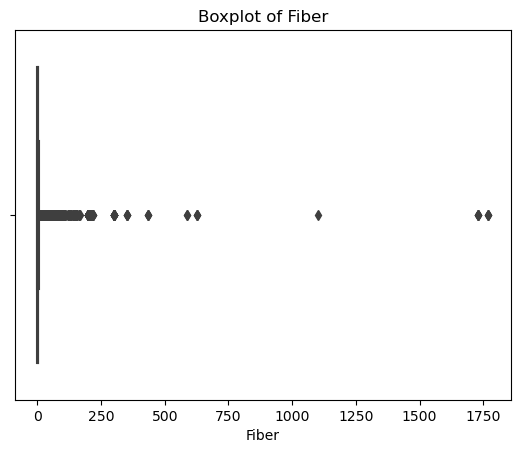

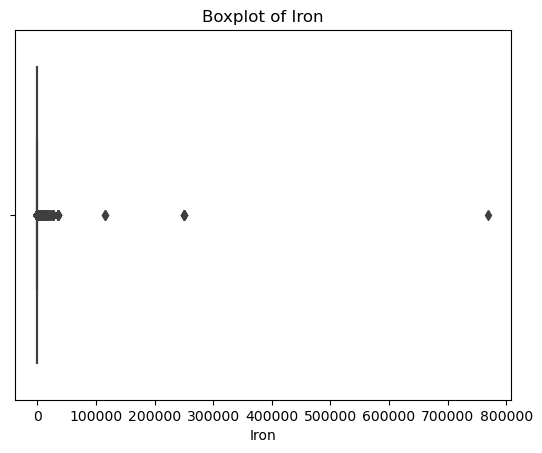

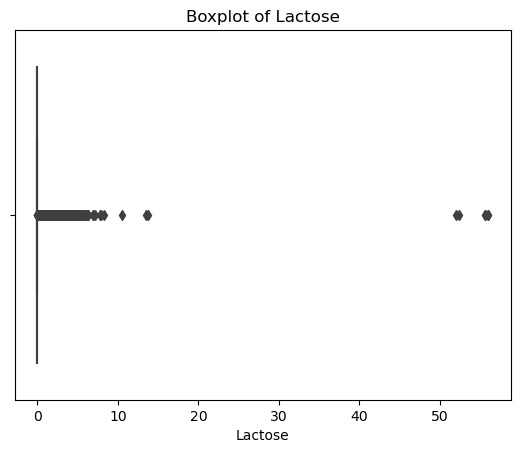

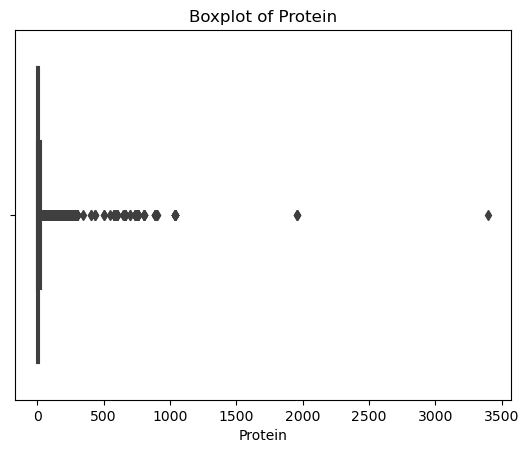

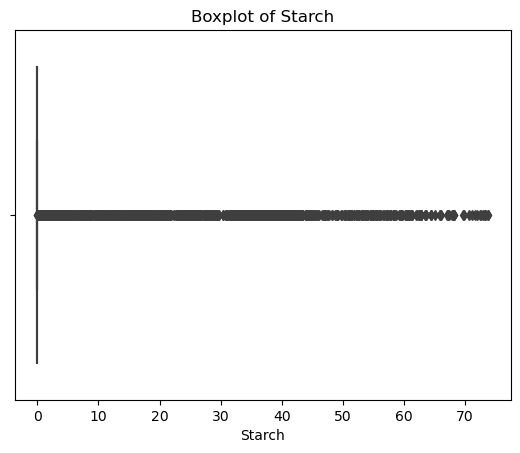

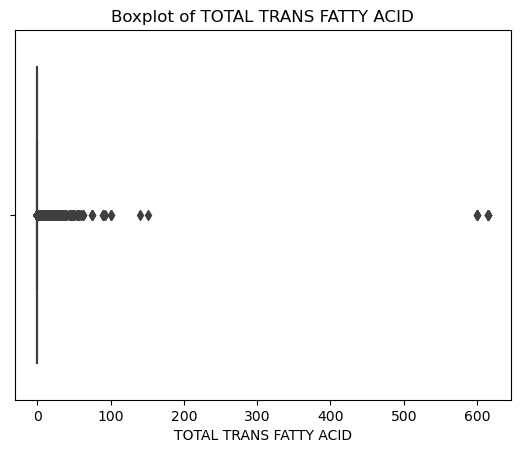

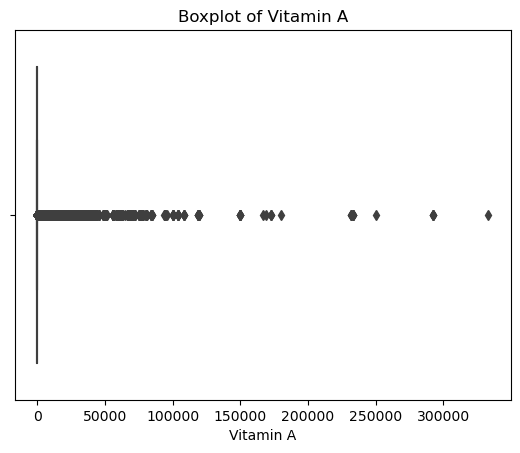

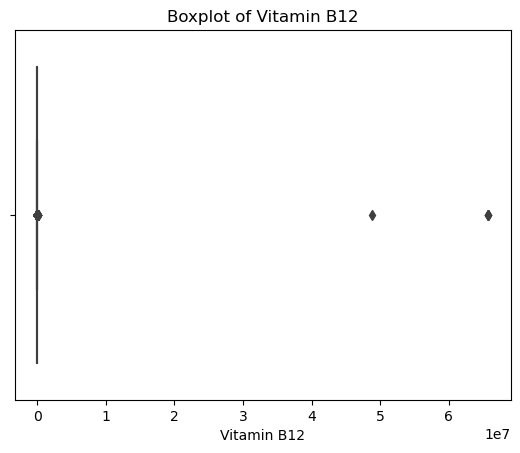

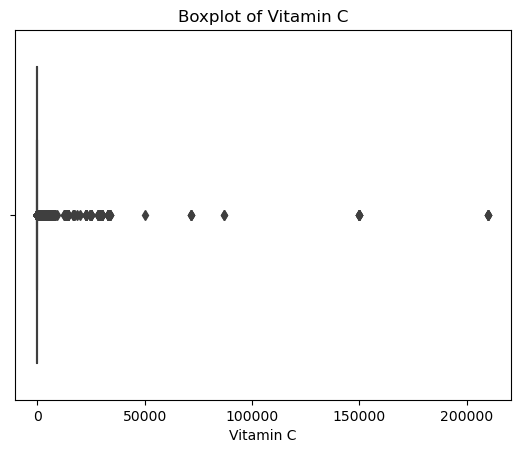

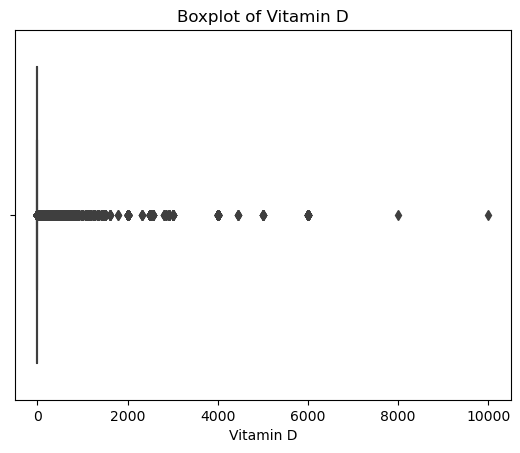

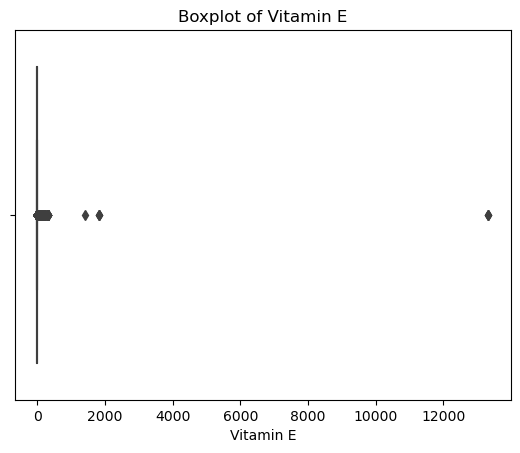

In [3]:
numeric_cols = [col for col in df.columns if df[col].dtype != "object"]
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [33]:
numeric_cols = [col for col in df.columns if df[col].dtype != "object" and col not in ["food_id", "nutrient_id","CALORIES"]]

# Calculate the mean and standard deviation for each numeric column
means = df[numeric_cols].mean()
stds = df[numeric_cols].std()

# Calculate the lower and upper bounds for outliers using z-score
z_score_threshold = 3
lower_bounds = means - z_score_threshold * stds
upper_bounds = means + z_score_threshold * stds

# Identify the outliers in each numeric column and count them
outlier_count = {}
for col in numeric_cols:
    z_scores = (df[col] - means[col]) / stds[col]
    outliers = df[abs(z_scores) > z_score_threshold]
    outlier_count[col] = len(outliers)

# Print the count of outliers for each numeric column
print("Outlier count using z-score:")
print(outlier_count)

Outlier count using z-score:
{'Caffeine': 969, 'Carbohydrate': 1581, 'FAT': 23067, 'Fat, saturated': 31972, 'Fiber': 30206, 'Iron': 821, 'Lactose': 37, 'Protein': 21025, 'Starch': 173, 'TOTAL TRANS FATTY ACID': 11683, 'Vitamin A': 31335, 'Vitamin B12': 140, 'Vitamin C': 9756, 'Vitamin D': 28065, 'Vitamin E': 3716}


In [34]:
outlier_indices = []
for col in numeric_cols:
    z_scores = (df[col] - means[col]) / stds[col]
    outliers = df[abs(z_scores) > z_score_threshold]
    outlier_indices.extend(outliers.index)

df_no_outliers = df.drop(outlier_indices).reset_index(drop=True)


/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


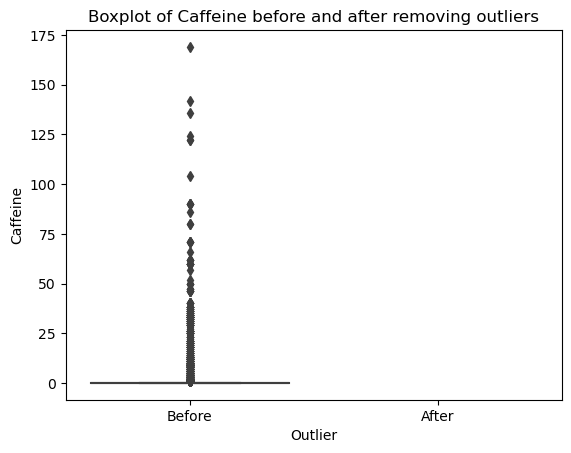

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


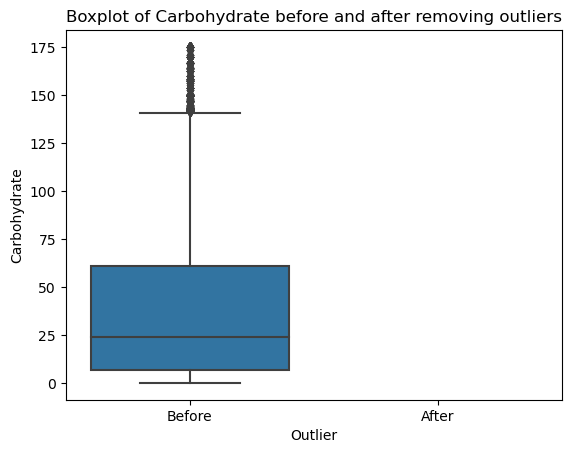

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


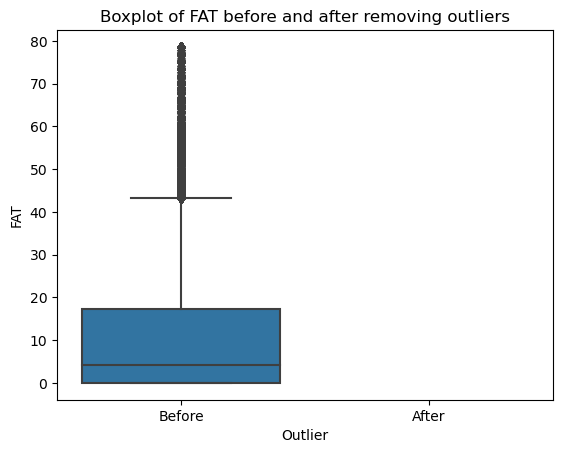

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


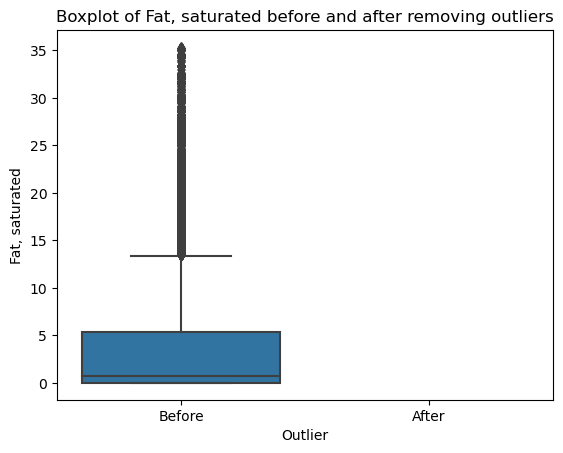

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


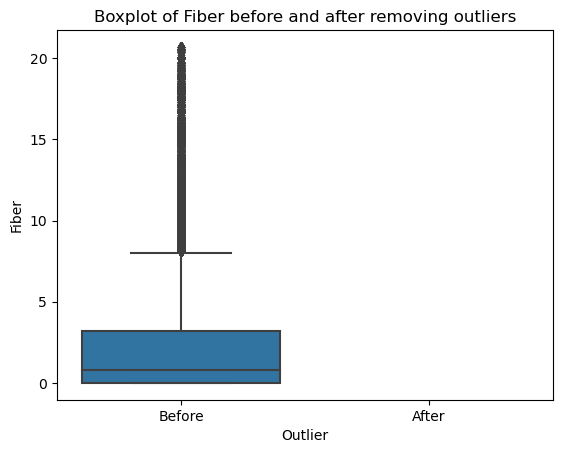

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


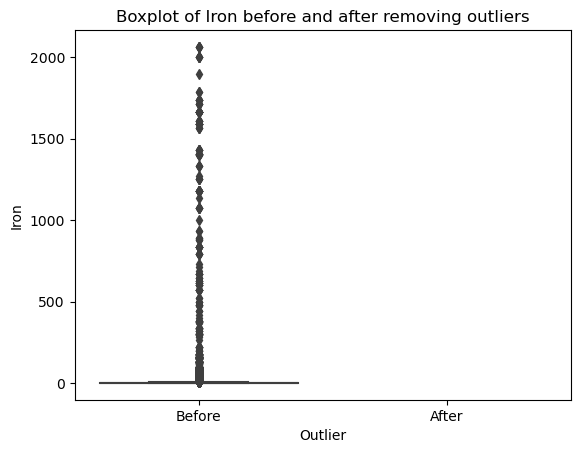

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


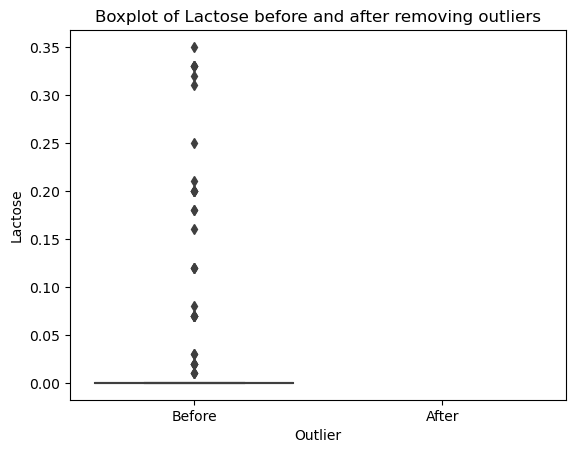

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


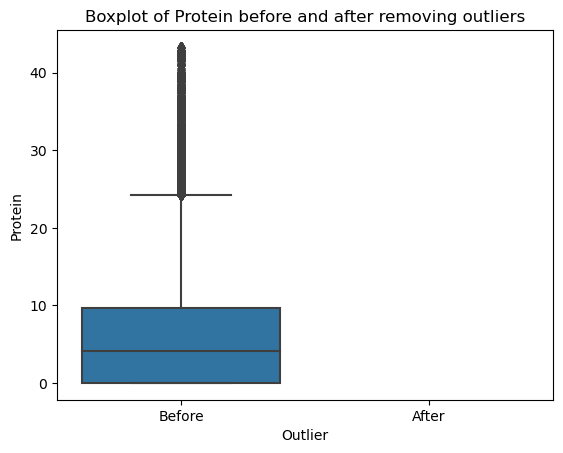

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


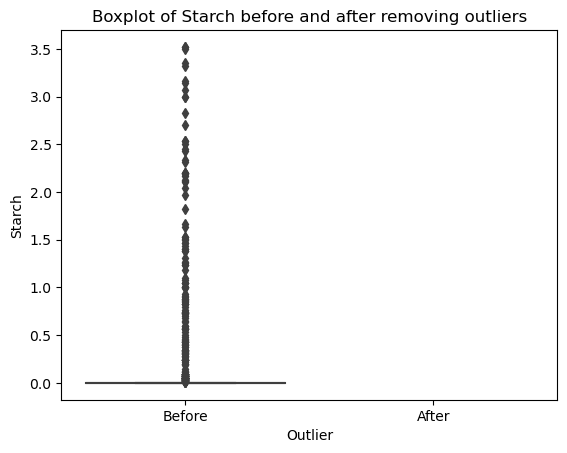

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


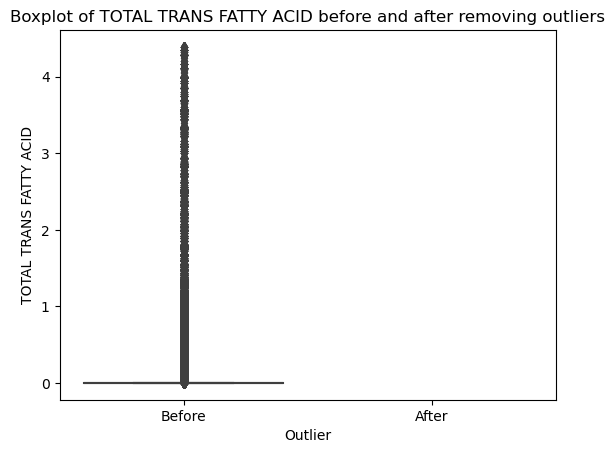

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


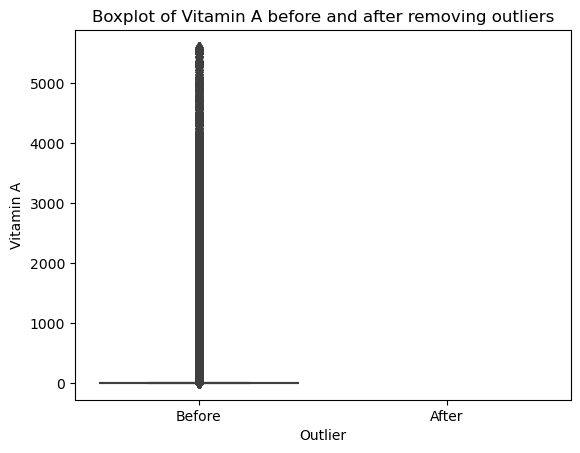

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


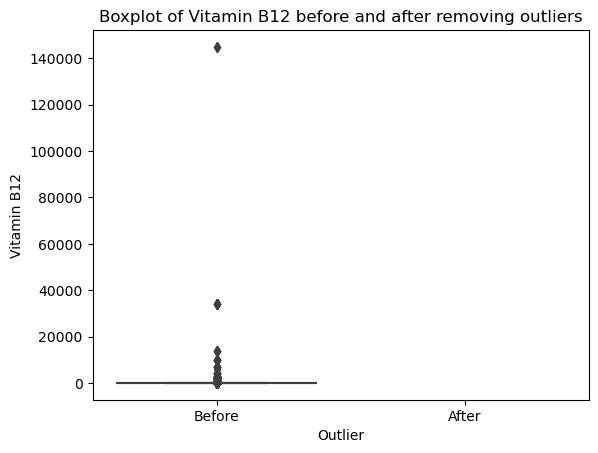

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


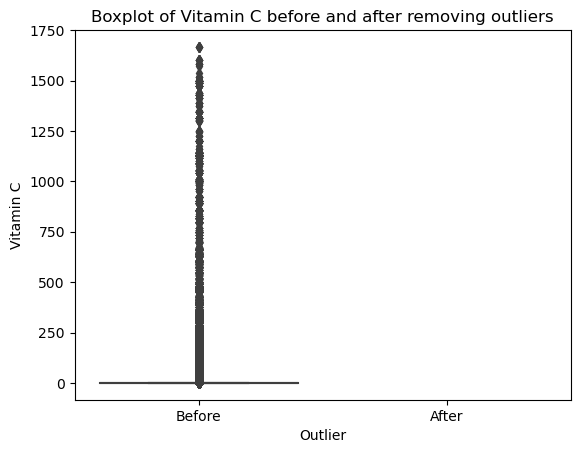

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


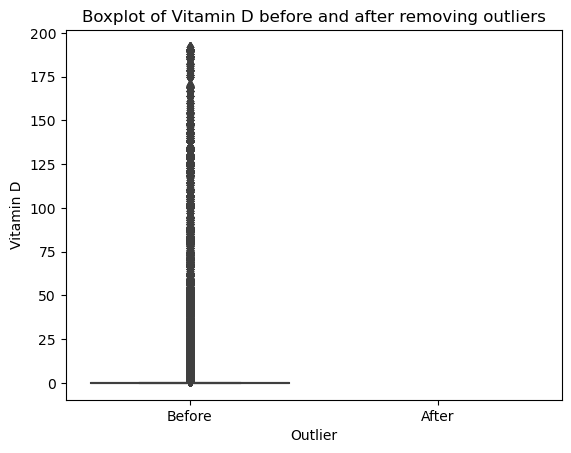

/var/folders/s8/l77vf42d6qsg12wpvgk1p38h0000gr/T/ipykernel_19218/2411940977.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_concat = df_concat.melt(var_name="Outlier", value_name=col)


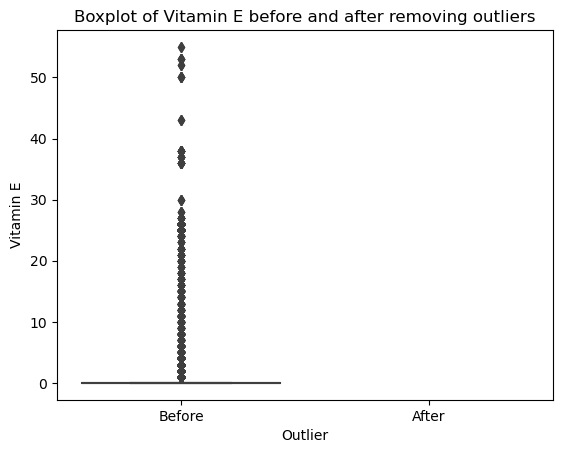

In [36]:
for col in numeric_cols:
    df_concat = pd.concat([df[col], df_no_outliers[col]], axis=1)
    df_concat = df_concat.melt(var_name="Outlier", value_name=col)
    df_concat["Outlier"] = np.where(df_concat[col].isin(df[col]), "Before", "After")
    sns.boxplot(x="Outlier", y=col, data=df_concat)
    plt.title(f"Boxplot of {col} before and after removing outliers")
    plt.show()

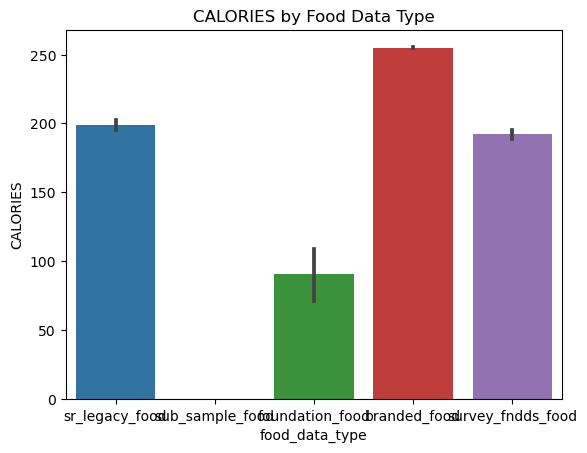

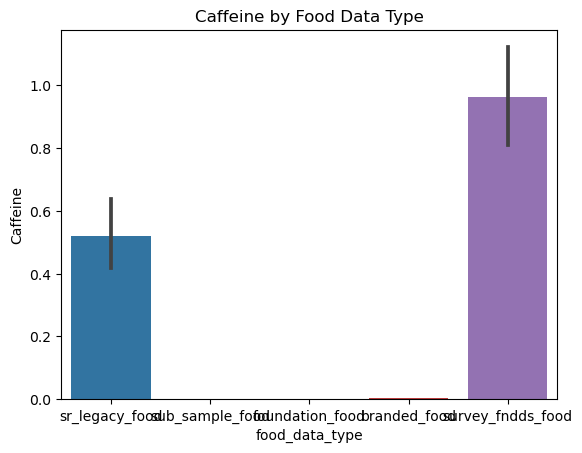

KeyboardInterrupt: 

In [37]:
nutrition_cols = [col for col in df.columns if col not in ["food_id", "food_data_type", "food_description", "nutrient_id"]]

# Create a bar plot for each nutrient column
for col in nutrition_cols:
    # Plot the bar plot using seaborn
    sns.barplot(x="food_data_type", y=col, data=df)
    
    # Set the title of the plot using the nutrient column
    plt.title(f"{col} by Food Data Type")
    
    # Display the plot
    plt.show()

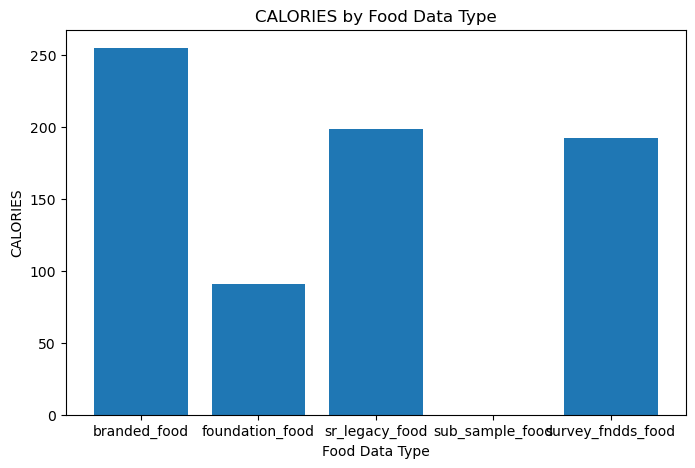

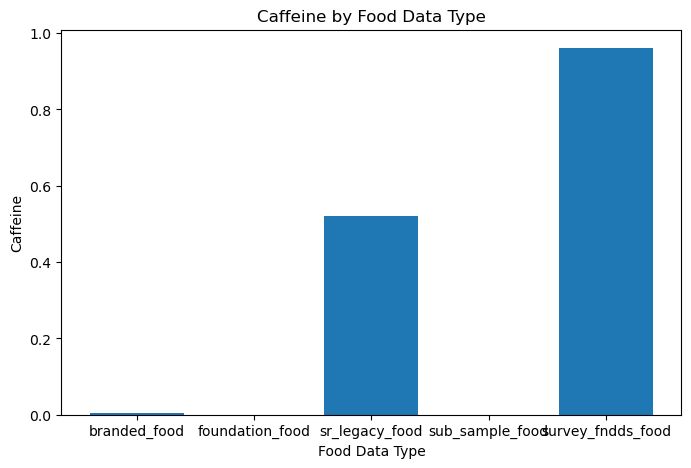

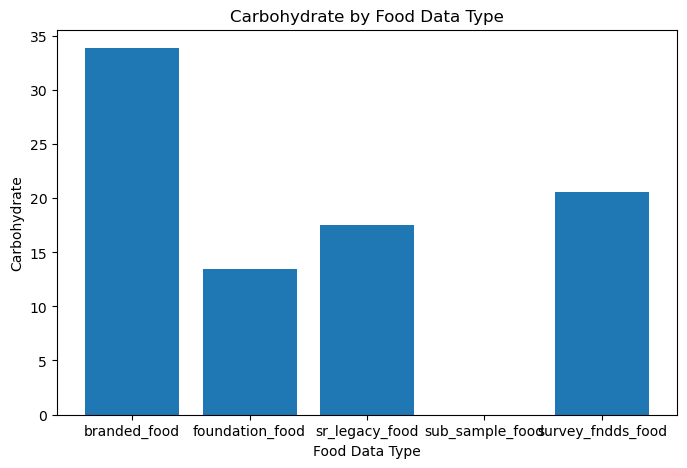

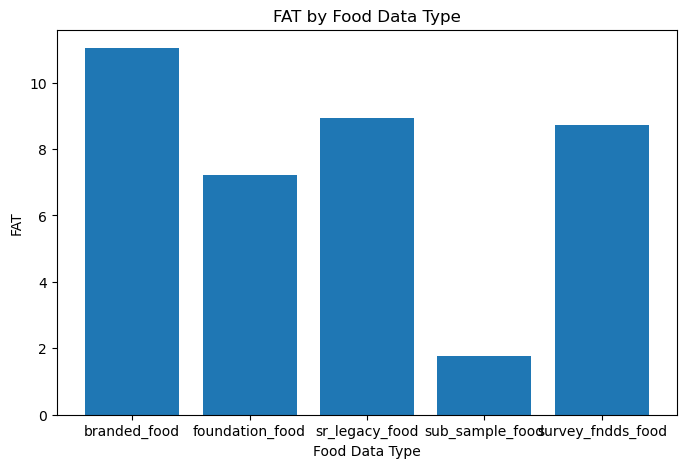

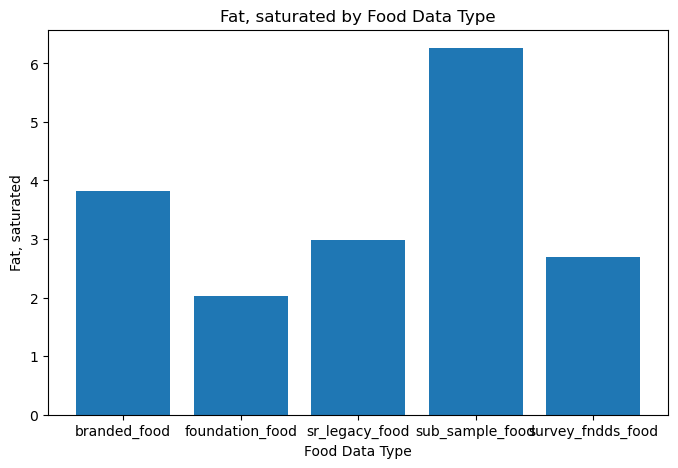

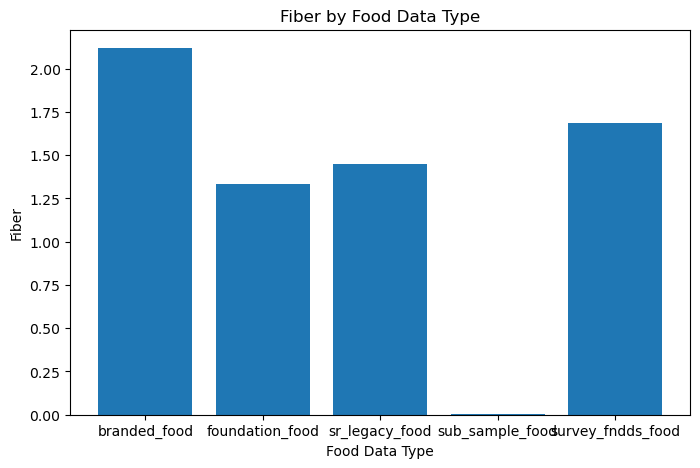

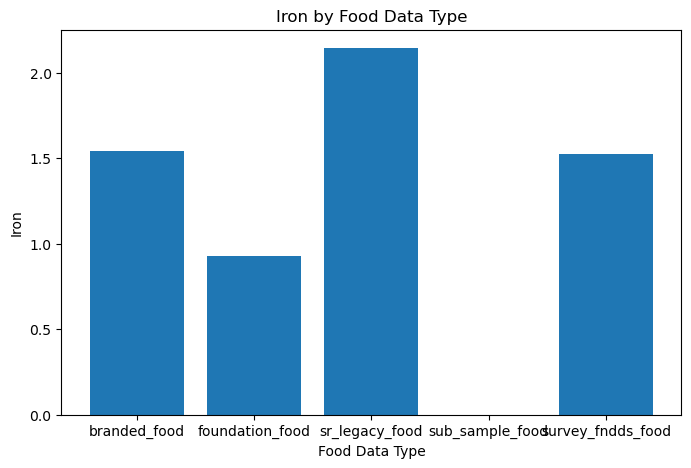

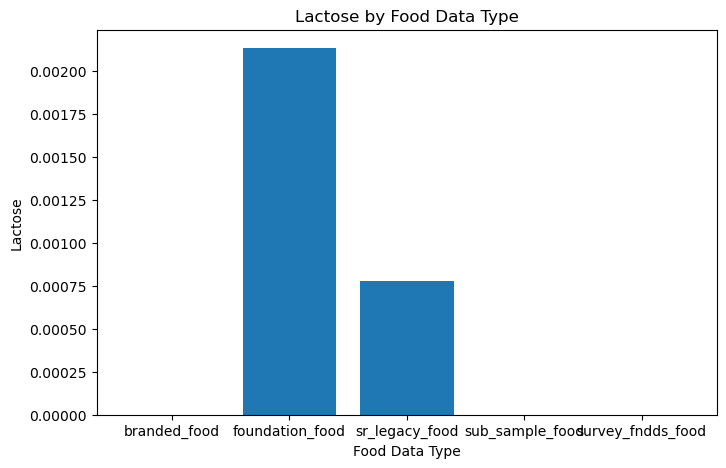

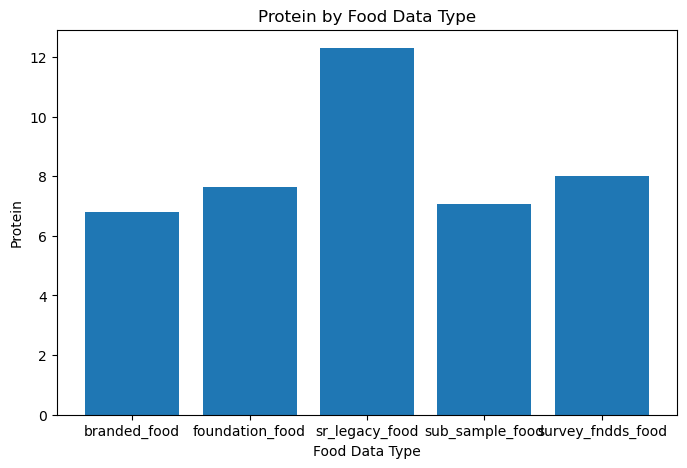

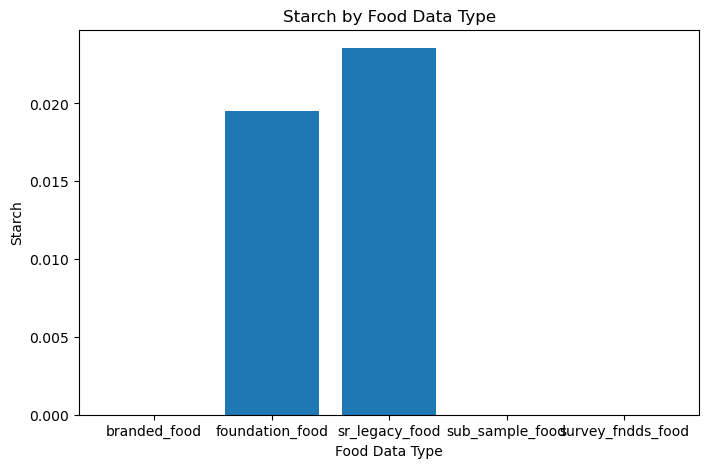

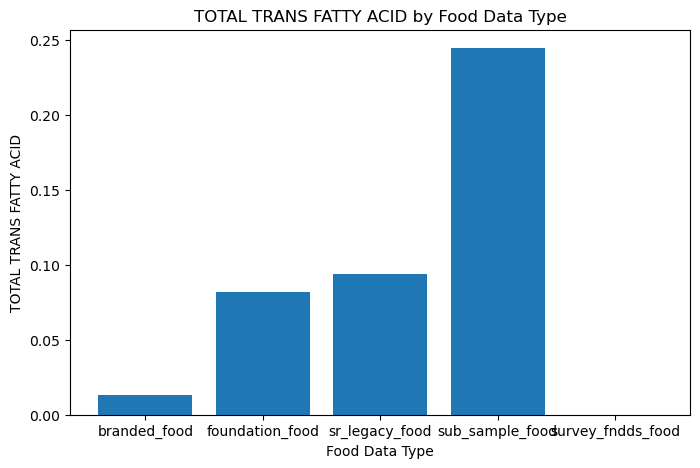

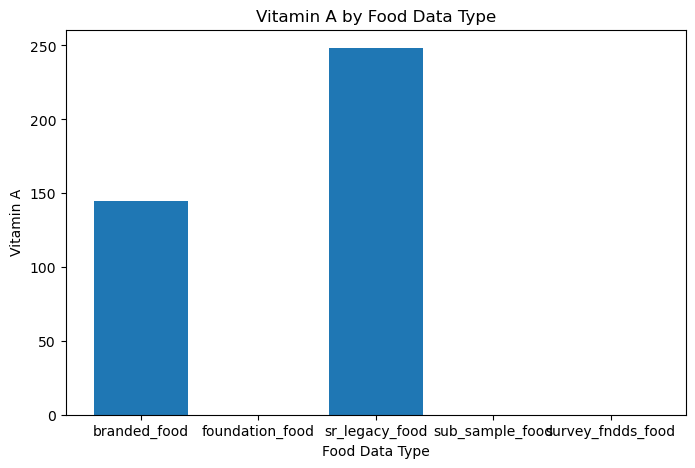

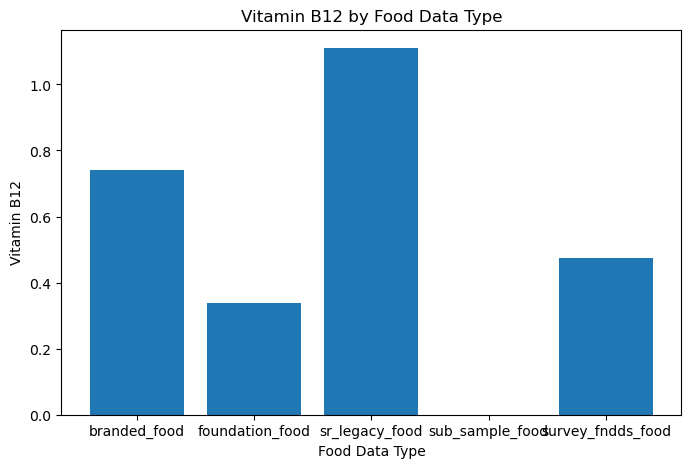

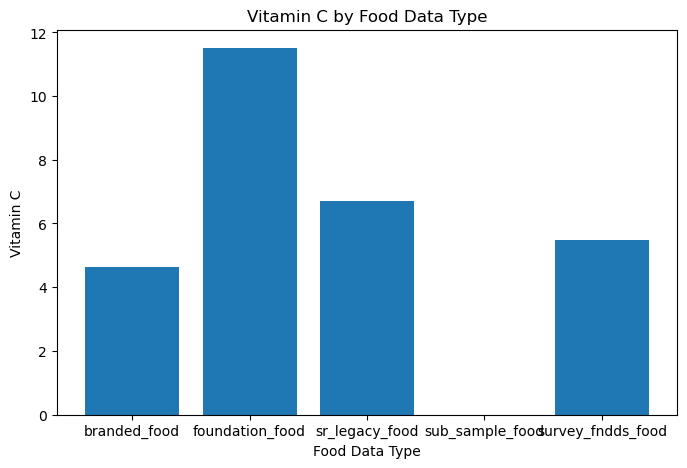

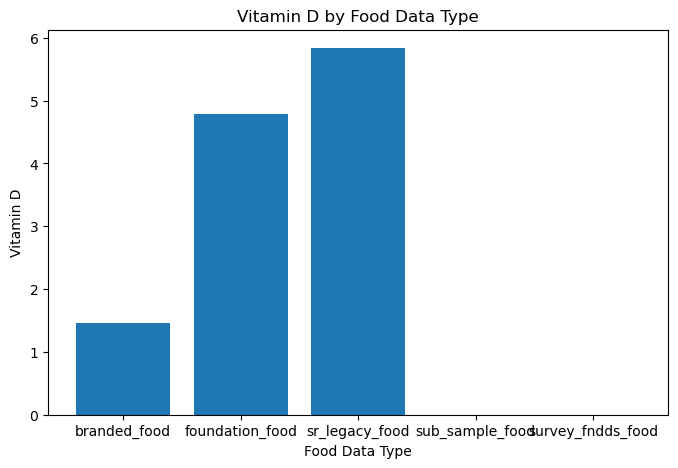

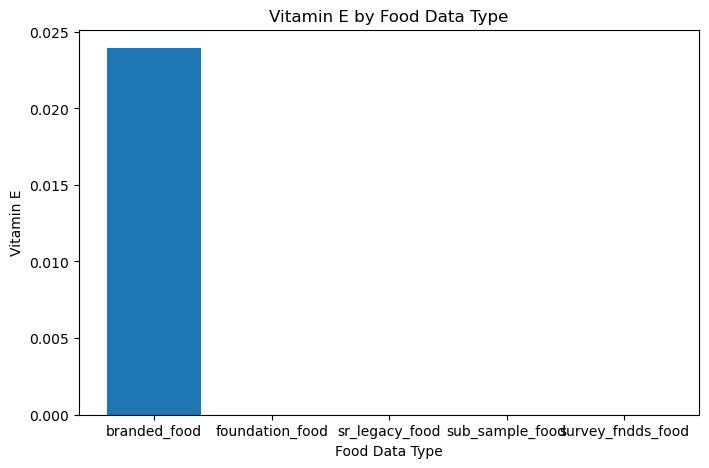

In [43]:
nutrition_cols = [col for col in df.columns if col not in ["food_id", "food_data_type", "food_description", "nutrient_id"]]

# Create a bar plot for each nutrient column
for col in nutrition_cols:
    # Extract the data for the current nutrient column
    nutrient_data = df.groupby("food_data_type")[col].mean()
    
    # Create a new figure with size 8x5 inches
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Create a bar plot using matplotlib
    ax.bar(nutrient_data.index, nutrient_data.values)
    
    # Set the title of the plot using the nutrient column
    ax.set_title(f"{col} by Food Data Type")
    
    # Set the x-axis label
    ax.set_xlabel("Food Data Type")
    
    # Set the y-axis label
    ax.set_ylabel(col)
    
    # Display the plot
    plt.show()